# Part 4: Model Experimentation with RNN, CNN, and Transformer

We now explore various model architectures with each of the modalities.

In [1]:
import os
import sys
import copy
import pickle
import datetime
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import keras.api._v2.keras as keras
import keras.backend as K
from keras.optimizers.legacy import Adam
from keras.optimizers import SGD
from keras import callbacks
from keras.models import Model
from keras.layers import Layer, Dense, Input, Activation, Lambda, BatchNormalization, Conv1D, SpatialDropout1D, add, GlobalAveragePooling1D, LSTM, Dense, concatenate, TimeDistributed, Bidirectional, Dropout, Embedding, Attention, MultiHeadAttention, LayerNormalization, Flatten, Conv2D, MaxPooling1D, MaxPooling2D
from keras.activations import sigmoid
from sklearn.model_selection import KFold
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score
import tensorflow as tf
from data_load import load_data
from basemodel import BaseModel

%load_ext autoreload
%autoreload 2

In [2]:
# Load data
train_data, train_label, test_data, test_label, train_text, train_audio, train_visual, test_text, test_audio, test_visual = load_data()

Number of training samples:  120
Number of testing samples:  31
Max length of sequences:  110

No. of samples per class: {'neu': 1708, 'fru': 1849, 'ang': 1103, 'sad': 1084, 'exc': 1041, 'hap': 648}

Train text shape: 120 samples, 110 timesteps, 100 features
Train audio shape: 120 samples, 110 timesteps, 100 features
Train visual shape: 120 samples, 110 timesteps, 512 features

Test text shape: 31 samples, 110 timesteps, 100 features
Test audio shape: 31 samples, 110 timesteps, 100 features
Test visual shape: 31 samples, 110 timesteps, 512 features



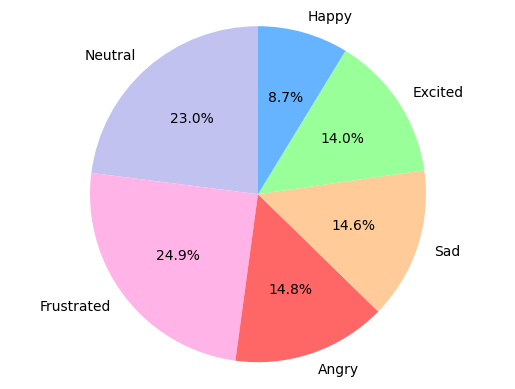

In [3]:
# Pie chart of distribution of labels

import pandas as pd

distribution = {'Neutral': 1708, 'Frustrated': 1849, 'Angry': 1103, 'Sad': 1084, 'Excited': 1041, 'Happy': 648}
labels = distribution.keys()
sizes = distribution.values()

fig1, ax1 = plt.subplots()
colors = ['#c2c2f0','#ffb3e6','#ff6666', '#ffcc99', '#99ff99', '#66b3ff']

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax1.axis('equal')

plt.show()

First, we define a RNN model that is suited for text, and evaluate it across other modalities as well.

In [275]:
# Define RNN model

class RNNModel(BaseModel):
    def build_model(self):
        inputs = Input(shape=self.input_shape)
        x = Bidirectional(LSTM(64, return_sequences=True))(inputs)
        x = Bidirectional(LSTM(64, return_sequences=True))(x)
        x = Dropout(0.5)(x)
        x = Dense(64, activation='relu')(x)
        outputs = Dense(self.num_classes, activation='softmax')(x)
        return Model(inputs, outputs)


In [265]:
# Train and evaluate based on train data for text modality
rnn_model_text = RNNModel(input_shape=(train_text.shape[1:]), num_classes=train_label.shape[2])
rnn_model_text.cross_val_train(train_text, train_label, num_folds=5, epochs=10, batch_size=32)

Epoch 1/10


2024-03-31 21:32:43.574624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:32:44.094286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:32:44.324863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:32:44.686319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:32:44.700496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:32:45.415774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:32:45.440280: I tensorflow/core/grappler/optimizers/cust

3/3 [==============================] - ETA: 0s - loss: 1.7636 - accuracy: 0.4158

2024-03-31 21:32:48.464861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:32:48.616951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:32:48.633693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:32:49.001360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:32:49.012791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 7s 1s/step - loss: 1.7636 - accuracy: 0.4158 - val_loss: 1.6407 - val_accuracy: 0.7598
Epoch 2/10
3/3 [==============================] - 1s 343ms/step - loss: 1.5816 - accuracy: 0.7534 - val_loss: 1.4568 - val_accuracy: 0.8072
Epoch 3/10
3/3 [==============================] - 1s 273ms/step - loss: 1.3886 - accuracy: 0.8154 - val_loss: 1.2163 - val_accuracy: 0.8326
Epoch 4/10
3/3 [==============================] - 1s 250ms/step - loss: 1.1220 - accuracy: 0.8420 - val_loss: 0.8504 - val_accuracy: 0.8481
Epoch 5/10
3/3 [==============================] - 1s 211ms/step - loss: 0.7179 - accuracy: 0.8509 - val_loss: 0.4734 - val_accuracy: 0.8470
Epoch 6/10
3/3 [==============================] - 0s 156ms/step - loss: 0.4520 - accuracy: 0.8510 - val_loss: 0.3697 - val_accuracy: 0.8633
Epoch 7/10
3/3 [==============================] - 0s 211ms/step - loss: 0.3664 - accuracy: 0.8726 - val_loss: 0.3091 - val_accuracy: 0.8902
Epoch 8/10
3/3 [==================

2024-03-31 21:32:55.426670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:32:55.551750: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:32:55.563404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:32:55.919110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:32:55.930287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 21:32:57.943799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:32:58.392278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:32:58.407489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:32:58.782876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:32:58.796882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-0

3/3 [==============================] - ETA: 0s - loss: 1.7604 - accuracy: 0.4531

2024-03-31 21:33:03.574099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:03.807273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:03.823745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:04.180274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:04.191785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 8s 2s/step - loss: 1.7604 - accuracy: 0.4531 - val_loss: 1.6298 - val_accuracy: 0.7750
Epoch 2/10
3/3 [==============================] - 1s 403ms/step - loss: 1.5720 - accuracy: 0.7741 - val_loss: 1.4522 - val_accuracy: 0.8235
Epoch 3/10
3/3 [==============================] - 1s 528ms/step - loss: 1.3896 - accuracy: 0.8193 - val_loss: 1.2449 - val_accuracy: 0.8375
Epoch 4/10
3/3 [==============================] - 1s 279ms/step - loss: 1.1665 - accuracy: 0.8424 - val_loss: 0.9360 - val_accuracy: 0.8655
Epoch 5/10
3/3 [==============================] - 1s 214ms/step - loss: 0.8185 - accuracy: 0.8592 - val_loss: 0.5094 - val_accuracy: 0.8867
Epoch 6/10
3/3 [==============================] - 1s 186ms/step - loss: 0.4671 - accuracy: 0.8680 - val_loss: 0.3552 - val_accuracy: 0.8871
Epoch 7/10
3/3 [==============================] - 0s 161ms/step - loss: 0.3605 - accuracy: 0.8788 - val_loss: 0.3101 - val_accuracy: 0.8977
Epoch 8/10
3/3 [==================

2024-03-31 21:33:11.712394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:11.842443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:11.853979: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:12.196814: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:12.207991: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 21:33:14.173537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:14.519613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:14.519636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:14.957262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:14.971808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-0

3/3 [==============================] - ETA: 0s - loss: 1.7311 - accuracy: 0.4860

2024-03-31 21:33:18.379290: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:18.517722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:18.530961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:18.883702: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:18.896229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 6s 1s/step - loss: 1.7311 - accuracy: 0.4860 - val_loss: 1.6063 - val_accuracy: 0.7799
Epoch 2/10
3/3 [==============================] - 1s 359ms/step - loss: 1.5348 - accuracy: 0.7683 - val_loss: 1.4098 - val_accuracy: 0.8284
Epoch 3/10
3/3 [==============================] - 1s 234ms/step - loss: 1.3188 - accuracy: 0.8183 - val_loss: 1.1143 - val_accuracy: 0.8633
Epoch 4/10
3/3 [==============================] - 1s 493ms/step - loss: 0.9742 - accuracy: 0.8423 - val_loss: 0.5959 - val_accuracy: 0.8864
Epoch 5/10
3/3 [==============================] - 1s 346ms/step - loss: 0.5401 - accuracy: 0.8548 - val_loss: 0.3599 - val_accuracy: 0.8807
Epoch 6/10
3/3 [==============================] - 1s 207ms/step - loss: 0.4010 - accuracy: 0.8627 - val_loss: 0.3032 - val_accuracy: 0.8932
Epoch 7/10
3/3 [==============================] - 1s 226ms/step - loss: 0.3399 - accuracy: 0.8795 - val_loss: 0.2677 - val_accuracy: 0.9064
Epoch 8/10
3/3 [==================

2024-03-31 21:33:25.970059: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:26.096477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:26.107353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:26.539593: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:26.552120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 21:33:28.985203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:29.356489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:29.372925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:29.734672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:29.748390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-0

3/3 [==============================] - ETA: 0s - loss: 1.7470 - accuracy: 0.4756

2024-03-31 21:33:32.864589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:33.019489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:33.031065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:33.389097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:33.401090: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 6s 1s/step - loss: 1.7470 - accuracy: 0.4756 - val_loss: 1.6256 - val_accuracy: 0.7867
Epoch 2/10
3/3 [==============================] - 1s 438ms/step - loss: 1.5557 - accuracy: 0.7820 - val_loss: 1.4424 - val_accuracy: 0.8330
Epoch 3/10
3/3 [==============================] - 1s 309ms/step - loss: 1.3466 - accuracy: 0.8242 - val_loss: 1.1828 - val_accuracy: 0.8477
Epoch 4/10
3/3 [==============================] - 1s 258ms/step - loss: 1.0426 - accuracy: 0.8372 - val_loss: 0.7533 - val_accuracy: 0.8576
Epoch 5/10
3/3 [==============================] - 1s 242ms/step - loss: 0.6114 - accuracy: 0.8491 - val_loss: 0.4512 - val_accuracy: 0.8602
Epoch 6/10
3/3 [==============================] - 0s 189ms/step - loss: 0.4219 - accuracy: 0.8604 - val_loss: 0.3789 - val_accuracy: 0.8750
Epoch 7/10
3/3 [==============================] - 1s 227ms/step - loss: 0.3614 - accuracy: 0.8752 - val_loss: 0.3335 - val_accuracy: 0.8936
Epoch 8/10
3/3 [==================

2024-03-31 21:33:40.238730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:40.366750: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:40.377505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:40.783899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:40.796132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 21:33:44.344411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:44.723509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:44.723532: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:45.264089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:45.278658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-0

3/3 [==============================] - ETA: 0s - loss: 1.7447 - accuracy: 0.5114

2024-03-31 21:33:49.020136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:49.194690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:49.205964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:49.567712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:49.581175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 7s 1s/step - loss: 1.7447 - accuracy: 0.5114 - val_loss: 1.6206 - val_accuracy: 0.8239
Epoch 2/10
3/3 [==============================] - 1s 386ms/step - loss: 1.5594 - accuracy: 0.8058 - val_loss: 1.4274 - val_accuracy: 0.8492
Epoch 3/10
3/3 [==============================] - 1s 332ms/step - loss: 1.3366 - accuracy: 0.8563 - val_loss: 1.1437 - val_accuracy: 0.8610
Epoch 4/10
3/3 [==============================] - 1s 241ms/step - loss: 0.9861 - accuracy: 0.8677 - val_loss: 0.6612 - val_accuracy: 0.8712
Epoch 5/10
3/3 [==============================] - 1s 229ms/step - loss: 0.5392 - accuracy: 0.8671 - val_loss: 0.4169 - val_accuracy: 0.8674
Epoch 6/10
3/3 [==============================] - 1s 216ms/step - loss: 0.3863 - accuracy: 0.8696 - val_loss: 0.3603 - val_accuracy: 0.8780
Epoch 7/10
3/3 [==============================] - 1s 300ms/step - loss: 0.3368 - accuracy: 0.8877 - val_loss: 0.3254 - val_accuracy: 0.8955
Epoch 8/10
3/3 [==================

2024-03-31 21:33:56.527852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:56.656294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:56.666961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:57.026159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:33:57.037356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
K-Fold Cross-Validation Results (5 folds):
Average Accuracy: 0.9183 ± 0.0083
Average Precision: 0.8523 ± 0.0080
Average Recall: 0.8542 ± 0.0160
Average F1-Score: 0.8509 ± 0.0124


In [296]:
# Train and evaluate based on test data for text modality

rnn_model_text_test = RNNModel(input_shape=train_text.shape[1:], num_classes=train_label.shape[2])
rnn_model_text_test.compile()
history, test_metrics = rnn_model_text_test.train_and_evaluate_on_test(train_text, train_label, test_text, test_label, epochs=10, batch_size=32)

Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:12:39.651645: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 22:12:40.118268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 22:12:40.516424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 22:12:41.407799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 22:12:41.423479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-0

4/4 [==============================] - 13s 2s/step - loss: 1.7276 - accuracy: 0.5691
Epoch 2/10
4/4 [==============================] - 3s 837ms/step - loss: 1.4707 - accuracy: 0.7986
Epoch 3/10
4/4 [==============================] - 2s 334ms/step - loss: 1.1306 - accuracy: 0.8325
Epoch 4/10
4/4 [==============================] - 1s 341ms/step - loss: 0.6371 - accuracy: 0.8489
Epoch 5/10
4/4 [==============================] - 2s 300ms/step - loss: 0.4119 - accuracy: 0.8634
Epoch 6/10
4/4 [==============================] - 1s 305ms/step - loss: 0.3323 - accuracy: 0.8854
Epoch 7/10
4/4 [==============================] - 1s 351ms/step - loss: 0.2933 - accuracy: 0.8993
Epoch 8/10
4/4 [==============================] - 1s 262ms/step - loss: 0.2585 - accuracy: 0.9110
Epoch 9/10
4/4 [==============================] - 1s 219ms/step - loss: 0.2253 - accuracy: 0.9240
Epoch 10/10
4/4 [==============================] - 1s 202ms/step - loss: 0.1984 - accuracy: 0.9334


2024-03-31 22:13:05.127798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 22:13:05.302911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 22:13:05.314026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 22:13:06.117370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 22:13:06.129362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Test Metrics:
Accuracy: 0.8035
F1 Score: 0.6739


RNN seems to perform very well for the textual modality.

In [282]:
# Cross validation of RNN model for audio modality
rnn_model_audio = RNNModel(input_shape=(train_audio.shape[1:]), num_classes=train_label.shape[2])
rnn_model_audio.cross_val_train(train_audio, train_label, num_folds=5, epochs=10, batch_size=32)

Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 21:40:55.201467: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:40:55.739952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:40:55.828704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:40:56.394570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:40:56.408359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-0

3/3 [==============================] - ETA: 0s - loss: 1.7665 - accuracy: 0.4914

2024-03-31 21:41:00.691765: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:00.872597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:00.883395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:01.286036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:01.302362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 8s 1s/step - loss: 1.7665 - accuracy: 0.4914 - val_loss: 1.7101 - val_accuracy: 0.7360
Epoch 2/10
3/3 [==============================] - 1s 394ms/step - loss: 1.6750 - accuracy: 0.6920 - val_loss: 1.5971 - val_accuracy: 0.7383
Epoch 3/10
3/3 [==============================] - 1s 533ms/step - loss: 1.5333 - accuracy: 0.6958 - val_loss: 1.3828 - val_accuracy: 0.7333
Epoch 4/10
3/3 [==============================] - 1s 282ms/step - loss: 1.2791 - accuracy: 0.6946 - val_loss: 0.9976 - val_accuracy: 0.7223
Epoch 5/10
3/3 [==============================] - 1s 255ms/step - loss: 0.9184 - accuracy: 0.6994 - val_loss: 0.7283 - val_accuracy: 0.7220
Epoch 6/10
3/3 [==============================] - 1s 251ms/step - loss: 0.7575 - accuracy: 0.7031 - val_loss: 0.6582 - val_accuracy: 0.7322
Epoch 7/10
3/3 [==============================] - 0s 122ms/step - loss: 0.7256 - accuracy: 0.7122 - val_loss: 0.6011 - val_accuracy: 0.7595
Epoch 8/10
3/3 [==================

2024-03-31 21:41:09.343714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:09.471776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:09.482961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:10.072508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:10.086229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 21:41:12.370565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:12.705676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:12.705780: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:13.438646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:13.452455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-0

3/3 [==============================] - ETA: 0s - loss: 1.7694 - accuracy: 0.4824

2024-03-31 21:41:19.955253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:20.131758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:20.380100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:20.917194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:20.930940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 11s 3s/step - loss: 1.7694 - accuracy: 0.4824 - val_loss: 1.7041 - val_accuracy: 0.6864
Epoch 2/10
3/3 [==============================] - 2s 516ms/step - loss: 1.6690 - accuracy: 0.7009 - val_loss: 1.5807 - val_accuracy: 0.6871
Epoch 3/10
3/3 [==============================] - 1s 497ms/step - loss: 1.5219 - accuracy: 0.7038 - val_loss: 1.3574 - val_accuracy: 0.6765
Epoch 4/10
3/3 [==============================] - 1s 270ms/step - loss: 1.2496 - accuracy: 0.6942 - val_loss: 0.9874 - val_accuracy: 0.6720
Epoch 5/10
3/3 [==============================] - 1s 173ms/step - loss: 0.9081 - accuracy: 0.6970 - val_loss: 0.7492 - val_accuracy: 0.7348
Epoch 6/10
3/3 [==============================] - 0s 156ms/step - loss: 0.7582 - accuracy: 0.6887 - val_loss: 0.7066 - val_accuracy: 0.6867
Epoch 7/10
3/3 [==============================] - 1s 240ms/step - loss: 0.7092 - accuracy: 0.7139 - val_loss: 0.7264 - val_accuracy: 0.6996
Epoch 8/10
3/3 [=================

2024-03-31 21:41:29.061227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:29.188000: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:29.198634: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:29.708461: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:29.719773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 21:41:32.431862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:32.852292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:32.888935: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:33.460785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:33.475961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-0

3/3 [==============================] - ETA: 0s - loss: 1.7685 - accuracy: 0.5285

2024-03-31 21:41:37.726876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:37.901271: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:37.912662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:38.398956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:38.410833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 8s 1s/step - loss: 1.7685 - accuracy: 0.5285 - val_loss: 1.7003 - val_accuracy: 0.6943
Epoch 2/10
3/3 [==============================] - 2s 641ms/step - loss: 1.6771 - accuracy: 0.6837 - val_loss: 1.5852 - val_accuracy: 0.6542
Epoch 3/10
3/3 [==============================] - 2s 803ms/step - loss: 1.5278 - accuracy: 0.6834 - val_loss: 1.3578 - val_accuracy: 0.6379
Epoch 4/10
3/3 [==============================] - 1s 434ms/step - loss: 1.2383 - accuracy: 0.6835 - val_loss: 1.0109 - val_accuracy: 0.6470
Epoch 5/10
3/3 [==============================] - 1s 279ms/step - loss: 0.8599 - accuracy: 0.6940 - val_loss: 0.8279 - val_accuracy: 0.6814
Epoch 6/10
3/3 [==============================] - 1s 152ms/step - loss: 0.7279 - accuracy: 0.7102 - val_loss: 0.8149 - val_accuracy: 0.7004
Epoch 7/10
3/3 [==============================] - 1s 191ms/step - loss: 0.6934 - accuracy: 0.7195 - val_loss: 0.8033 - val_accuracy: 0.7087
Epoch 8/10
3/3 [==================

2024-03-31 21:41:47.817386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:47.943065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:47.953675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:48.449963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:48.461137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 21:41:51.315198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:51.657659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:51.946541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:52.667462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:52.681510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-0

3/3 [==============================] - ETA: 0s - loss: 1.7718 - accuracy: 0.4342

2024-03-31 21:41:59.092572: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:59.255122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:59.265916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:59.850992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:41:59.862285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 11s 2s/step - loss: 1.7718 - accuracy: 0.4342 - val_loss: 1.7151 - val_accuracy: 0.7000
Epoch 2/10
3/3 [==============================] - 2s 717ms/step - loss: 1.7016 - accuracy: 0.6688 - val_loss: 1.6184 - val_accuracy: 0.7034
Epoch 3/10
3/3 [==============================] - 1s 353ms/step - loss: 1.6111 - accuracy: 0.6917 - val_loss: 1.4871 - val_accuracy: 0.7235
Epoch 4/10
3/3 [==============================] - 1s 296ms/step - loss: 1.4592 - accuracy: 0.7059 - val_loss: 1.2659 - val_accuracy: 0.7432
Epoch 5/10
3/3 [==============================] - 1s 325ms/step - loss: 1.1898 - accuracy: 0.7049 - val_loss: 0.9182 - val_accuracy: 0.7326
Epoch 6/10
3/3 [==============================] - 0s 166ms/step - loss: 0.8880 - accuracy: 0.7078 - val_loss: 0.7194 - val_accuracy: 0.7519
Epoch 7/10
3/3 [==============================] - 1s 186ms/step - loss: 0.7503 - accuracy: 0.7215 - val_loss: 0.6821 - val_accuracy: 0.7500
Epoch 8/10
3/3 [=================

2024-03-31 21:42:09.298446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:42:09.455179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:42:09.470355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:42:09.937046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:42:09.949334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 21:42:12.230263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:42:12.582115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:42:12.596295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:42:13.055182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:42:13.068646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-0

3/3 [==============================] - ETA: 0s - loss: 1.7705 - accuracy: 0.4793

2024-03-31 21:42:18.281404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:42:18.478845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:42:18.489697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:42:19.076137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:42:19.088534: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 9s 2s/step - loss: 1.7705 - accuracy: 0.4793 - val_loss: 1.7212 - val_accuracy: 0.6970
Epoch 2/10
3/3 [==============================] - 2s 689ms/step - loss: 1.6818 - accuracy: 0.6727 - val_loss: 1.6066 - val_accuracy: 0.7038
Epoch 3/10
3/3 [==============================] - 2s 561ms/step - loss: 1.5277 - accuracy: 0.6958 - val_loss: 1.3753 - val_accuracy: 0.6932
Epoch 4/10
3/3 [==============================] - 1s 449ms/step - loss: 1.2281 - accuracy: 0.6938 - val_loss: 0.9938 - val_accuracy: 0.6822
Epoch 5/10
3/3 [==============================] - 1s 232ms/step - loss: 0.8773 - accuracy: 0.6977 - val_loss: 0.7980 - val_accuracy: 0.7027
Epoch 6/10
3/3 [==============================] - 1s 244ms/step - loss: 0.7731 - accuracy: 0.7120 - val_loss: 0.7648 - val_accuracy: 0.7068
Epoch 7/10
3/3 [==============================] - 1s 260ms/step - loss: 0.7421 - accuracy: 0.7161 - val_loss: 0.7274 - val_accuracy: 0.7106
Epoch 8/10
3/3 [==================

2024-03-31 21:42:28.581725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:42:28.709307: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:42:28.720050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:42:29.223057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:42:29.234081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
K-Fold Cross-Validation Results (5 folds):
Average Accuracy: 0.7401 ± 0.0349
Average Precision: 0.5519 ± 0.0439
Average Recall: 0.5266 ± 0.0466
Average F1-Score: 0.4777 ± 0.0422


In [283]:
# Train and evaluate based on test data for audio modality

rnn_model_audio = RNNModel(input_shape=train_text.shape[1:], num_classes=train_label.shape[2])
rnn_model_audio.compile(lr=0.001)
history, test_metrics = rnn_model_audio.train_and_evaluate_on_test(train_audio, train_label, test_audio, test_label, epochs=10, batch_size=32)

Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 21:42:56.389438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:42:56.755626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:42:56.932167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:42:57.688692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:42:57.708052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-0

4/4 [==============================] - 10s 1s/step - loss: 1.7493 - accuracy: 0.6058
Epoch 2/10
4/4 [==============================] - 2s 589ms/step - loss: 1.5751 - accuracy: 0.6891
Epoch 3/10
4/4 [==============================] - 1s 277ms/step - loss: 1.1464 - accuracy: 0.6688
Epoch 4/10
4/4 [==============================] - 1s 219ms/step - loss: 0.8300 - accuracy: 0.6873
Epoch 5/10
4/4 [==============================] - 1s 211ms/step - loss: 0.7440 - accuracy: 0.7073
Epoch 6/10
4/4 [==============================] - 0s 114ms/step - loss: 0.7157 - accuracy: 0.7152
Epoch 7/10
4/4 [==============================] - 1s 143ms/step - loss: 0.6954 - accuracy: 0.7191
Epoch 8/10
4/4 [==============================] - 1s 134ms/step - loss: 0.6663 - accuracy: 0.7355
Epoch 9/10
4/4 [==============================] - 1s 119ms/step - loss: 0.6553 - accuracy: 0.7410
Epoch 10/10
4/4 [==============================] - 0s 116ms/step - loss: 0.6335 - accuracy: 0.7452


2024-03-31 21:43:13.307513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:43:13.464822: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:43:13.477346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:43:14.124424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:43:14.135594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Test Metrics:
Accuracy: 0.7217
Precision: 0.5848
Recall: 0.5207
F1 Score: 0.4893


RNN performs well on audio modality too.

In [284]:
# Cross validation of RNN model for visual modality

rnn_model_visual = RNNModel(input_shape=(train_visual.shape[1:]), num_classes=train_label.shape[2])
rnn_model_visual.cross_val_train(train_visual, train_label, num_folds=5, epochs=10, batch_size=32)

/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10


2024-03-31 21:43:55.259750: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:43:55.740524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:43:55.754991: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:43:56.394110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:43:56.408466: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:43:57.524543: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:43:57.557393: I tensorflow/core/grappler/optimizers/cust

3/3 [==============================] - ETA: 0s - loss: 1.7808 - accuracy: 0.4415

2024-03-31 21:44:02.813151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:44:03.014547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:44:03.036965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:44:03.623762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:44:03.635070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 11s 2s/step - loss: 1.7808 - accuracy: 0.4415 - val_loss: 1.7439 - val_accuracy: 0.7114
Epoch 2/10
3/3 [==============================] - 2s 540ms/step - loss: 1.7293 - accuracy: 0.6482 - val_loss: 1.6490 - val_accuracy: 0.7148
Epoch 3/10
3/3 [==============================] - 2s 655ms/step - loss: 1.6230 - accuracy: 0.6442 - val_loss: 1.4246 - val_accuracy: 0.7004
Epoch 4/10
3/3 [==============================] - 1s 342ms/step - loss: 1.3587 - accuracy: 0.6348 - val_loss: 0.9973 - val_accuracy: 0.7019
Epoch 5/10
3/3 [==============================] - 1s 305ms/step - loss: 1.0321 - accuracy: 0.6394 - val_loss: 0.7607 - val_accuracy: 0.7178
Epoch 6/10
3/3 [==============================] - 1s 305ms/step - loss: 0.8646 - accuracy: 0.6598 - val_loss: 0.7368 - val_accuracy: 0.7155
Epoch 7/10
3/3 [==============================] - 1s 317ms/step - loss: 0.8264 - accuracy: 0.6526 - val_loss: 0.7129 - val_accuracy: 0.7110
Epoch 8/10
3/3 [=================

2024-03-31 21:44:14.054724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:44:14.191415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:44:14.203639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:44:14.892562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:44:14.905711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 21:44:17.448055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:44:17.871980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:44:17.895134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:44:19.015313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:44:19.029876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-0

3/3 [==============================] - ETA: 0s - loss: 1.7780 - accuracy: 0.4958

2024-03-31 21:44:25.385064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:44:25.534197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:44:25.586528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:44:26.274168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:44:26.287794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 11s 2s/step - loss: 1.7780 - accuracy: 0.4958 - val_loss: 1.7417 - val_accuracy: 0.6682
Epoch 2/10
3/3 [==============================] - 2s 736ms/step - loss: 1.7157 - accuracy: 0.6726 - val_loss: 1.6450 - val_accuracy: 0.6659
Epoch 3/10
3/3 [==============================] - 1s 582ms/step - loss: 1.5884 - accuracy: 0.6710 - val_loss: 1.4342 - val_accuracy: 0.6572
Epoch 4/10
3/3 [==============================] - 2s 796ms/step - loss: 1.3060 - accuracy: 0.6644 - val_loss: 1.0705 - val_accuracy: 0.6466
Epoch 5/10
3/3 [==============================] - 1s 493ms/step - loss: 0.9475 - accuracy: 0.6675 - val_loss: 0.8614 - val_accuracy: 0.6663
Epoch 6/10
3/3 [==============================] - 1s 343ms/step - loss: 0.8161 - accuracy: 0.6704 - val_loss: 0.8441 - val_accuracy: 0.6723
Epoch 7/10
3/3 [==============================] - 1s 198ms/step - loss: 0.7969 - accuracy: 0.6664 - val_loss: 0.8382 - val_accuracy: 0.6360
Epoch 8/10
3/3 [=================

2024-03-31 21:44:38.253330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:44:38.407865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:44:38.418470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:44:39.025808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:44:39.036949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 21:44:42.826648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:44:43.328775: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:44:43.342078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:44:44.066203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:44:44.080626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-0

3/3 [==============================] - ETA: 0s - loss: 1.7842 - accuracy: 0.4476

2024-03-31 21:44:50.083211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:44:50.222121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:44:50.239507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:44:50.771446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:44:50.782688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 11s 2s/step - loss: 1.7842 - accuracy: 0.4476 - val_loss: 1.7638 - val_accuracy: 0.6761
Epoch 2/10
3/3 [==============================] - 2s 489ms/step - loss: 1.7428 - accuracy: 0.6672 - val_loss: 1.6990 - val_accuracy: 0.6769
Epoch 3/10
3/3 [==============================] - 2s 665ms/step - loss: 1.6552 - accuracy: 0.6700 - val_loss: 1.5449 - val_accuracy: 0.6754
Epoch 4/10
3/3 [==============================] - 1s 505ms/step - loss: 1.4529 - accuracy: 0.6641 - val_loss: 1.1764 - val_accuracy: 0.6697
Epoch 5/10
3/3 [==============================] - 2s 492ms/step - loss: 1.0902 - accuracy: 0.6566 - val_loss: 0.8917 - val_accuracy: 0.6742
Epoch 6/10
3/3 [==============================] - 1s 325ms/step - loss: 0.8569 - accuracy: 0.6646 - val_loss: 0.8280 - val_accuracy: 0.6811
Epoch 7/10
3/3 [==============================] - 1s 293ms/step - loss: 0.8253 - accuracy: 0.6663 - val_loss: 0.8022 - val_accuracy: 0.6750
Epoch 8/10
3/3 [=================

2024-03-31 21:45:02.434324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:02.563456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:02.574512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:03.172956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:03.184644: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 21:45:05.775766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:06.215375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:06.231969: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:06.941364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:06.955088: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-0

3/3 [==============================] - ETA: 0s - loss: 1.7815 - accuracy: 0.4682

2024-03-31 21:45:12.986131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:13.134263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:13.134307: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:13.789048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:13.800356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 10s 2s/step - loss: 1.7815 - accuracy: 0.4682 - val_loss: 1.7503 - val_accuracy: 0.6826
Epoch 2/10
3/3 [==============================] - 2s 678ms/step - loss: 1.7295 - accuracy: 0.6687 - val_loss: 1.6604 - val_accuracy: 0.6841
Epoch 3/10
3/3 [==============================] - 1s 614ms/step - loss: 1.6210 - accuracy: 0.6683 - val_loss: 1.4389 - val_accuracy: 0.6731
Epoch 4/10
3/3 [==============================] - 1s 532ms/step - loss: 1.3672 - accuracy: 0.6501 - val_loss: 1.0937 - val_accuracy: 0.6542
Epoch 5/10
3/3 [==============================] - 1s 347ms/step - loss: 1.0571 - accuracy: 0.6515 - val_loss: 0.8991 - val_accuracy: 0.6811
Epoch 6/10
3/3 [==============================] - 1s 391ms/step - loss: 0.9443 - accuracy: 0.6599 - val_loss: 0.8564 - val_accuracy: 0.6788
Epoch 7/10
3/3 [==============================] - 1s 447ms/step - loss: 0.8645 - accuracy: 0.6631 - val_loss: 0.7782 - val_accuracy: 0.6830
Epoch 8/10
3/3 [=================

2024-03-31 21:45:25.169035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:25.301373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:25.312862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:25.924513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:25.935444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 21:45:29.464835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:29.926663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:29.983834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:30.605727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:30.619567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-0

3/3 [==============================] - ETA: 0s - loss: 1.7810 - accuracy: 0.4634

2024-03-31 21:45:36.754541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:36.946345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:36.957328: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:37.534738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:37.546331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 11s 2s/step - loss: 1.7810 - accuracy: 0.4634 - val_loss: 1.7578 - val_accuracy: 0.6295
Epoch 2/10
3/3 [==============================] - 2s 709ms/step - loss: 1.7314 - accuracy: 0.6727 - val_loss: 1.6921 - val_accuracy: 0.6314
Epoch 3/10
3/3 [==============================] - 2s 458ms/step - loss: 1.6307 - accuracy: 0.6812 - val_loss: 1.5339 - val_accuracy: 0.6314
Epoch 4/10
3/3 [==============================] - 2s 599ms/step - loss: 1.3794 - accuracy: 0.6832 - val_loss: 1.2167 - val_accuracy: 0.6144
Epoch 5/10
3/3 [==============================] - 1s 391ms/step - loss: 1.0548 - accuracy: 0.6703 - val_loss: 1.0428 - val_accuracy: 0.6223
Epoch 6/10
3/3 [==============================] - 1s 453ms/step - loss: 0.8946 - accuracy: 0.6793 - val_loss: 0.9509 - val_accuracy: 0.6447
Epoch 7/10
3/3 [==============================] - 1s 259ms/step - loss: 0.8307 - accuracy: 0.6783 - val_loss: 0.8914 - val_accuracy: 0.6265
Epoch 8/10
3/3 [=================

2024-03-31 21:45:48.978756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:49.107529: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:49.118395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:49.753673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:49.764542: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
K-Fold Cross-Validation Results (5 folds):
Average Accuracy: 0.6754 ± 0.0231
Average Precision: 0.2878 ± 0.0194
Average Recall: 0.3240 ± 0.0046
Average F1-Score: 0.2461 ± 0.0109


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [285]:
# Test on video modality

rnn_model_visual = RNNModel(input_shape=train_visual.shape[1:], num_classes=train_label.shape[2])
rnn_model_visual.compile(lr=0.001)
history, test_metrics = rnn_model_visual.train_and_evaluate_on_test(train_visual, train_label, test_visual, test_label, epochs=10, batch_size=32)

Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 21:45:52.719136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:53.112534: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:53.112558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:53.947444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:45:53.963080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-0

4/4 [==============================] - 11s 1s/step - loss: 1.7677 - accuracy: 0.5302
Epoch 2/10
4/4 [==============================] - 3s 616ms/step - loss: 1.6478 - accuracy: 0.6702
Epoch 3/10
4/4 [==============================] - 2s 423ms/step - loss: 1.2829 - accuracy: 0.6489
Epoch 4/10
4/4 [==============================] - 1s 242ms/step - loss: 0.9899 - accuracy: 0.6554
Epoch 5/10
4/4 [==============================] - 1s 195ms/step - loss: 0.8427 - accuracy: 0.6695
Epoch 6/10
4/4 [==============================] - 1s 226ms/step - loss: 0.8089 - accuracy: 0.6535
Epoch 7/10
4/4 [==============================] - 1s 161ms/step - loss: 0.7856 - accuracy: 0.6639
Epoch 8/10
4/4 [==============================] - 1s 138ms/step - loss: 0.7768 - accuracy: 0.6689
Epoch 9/10
4/4 [==============================] - 1s 122ms/step - loss: 0.7675 - accuracy: 0.6756
Epoch 10/10
4/4 [==============================] - 0s 102ms/step - loss: 0.7650 - accuracy: 0.6767


2024-03-31 21:46:11.958492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:46:12.087278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:46:12.087299: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:46:12.743891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:46:12.755504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Test Metrics:
Accuracy: 0.6478
Precision: 0.2612
Recall: 0.3306
F1 Score: 0.2509


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RNN does not perform as well on video modality.

In [286]:
# Cross validation for multimodal data

rnn_model_multimodal = RNNModel(input_shape=(train_data.shape[1:]), num_classes=train_label.shape[2])
rnn_model_multimodal.cross_val_train(train_data, train_label, num_folds=5, epochs=10, batch_size=32)

Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 21:46:53.350887: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:46:53.728105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:46:53.903752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:46:54.606622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:46:54.620672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-0

3/3 [==============================] - ETA: 0s - loss: 1.7385 - accuracy: 0.4615

2024-03-31 21:47:01.311240: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:47:01.507117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:47:01.518357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:47:02.183442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:47:02.194856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 12s 2s/step - loss: 1.7385 - accuracy: 0.4615 - val_loss: 1.5698 - val_accuracy: 0.7769
Epoch 2/10
3/3 [==============================] - 2s 716ms/step - loss: 1.5184 - accuracy: 0.7843 - val_loss: 1.3737 - val_accuracy: 0.8064
Epoch 3/10
3/3 [==============================] - 2s 793ms/step - loss: 1.3128 - accuracy: 0.8254 - val_loss: 1.1324 - val_accuracy: 0.8508
Epoch 4/10
3/3 [==============================] - 2s 670ms/step - loss: 1.0380 - accuracy: 0.8536 - val_loss: 0.7475 - val_accuracy: 0.8674
Epoch 5/10
3/3 [==============================] - 2s 552ms/step - loss: 0.6568 - accuracy: 0.8639 - val_loss: 0.3905 - val_accuracy: 0.8860
Epoch 6/10
3/3 [==============================] - 1s 346ms/step - loss: 0.4057 - accuracy: 0.8780 - val_loss: 0.2906 - val_accuracy: 0.9057
Epoch 7/10
3/3 [==============================] - 1s 327ms/step - loss: 0.3267 - accuracy: 0.8876 - val_loss: 0.2543 - val_accuracy: 0.9246
Epoch 8/10
3/3 [=================

2024-03-31 21:47:17.116083: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:47:17.275620: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:47:17.275721: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:47:18.195161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:47:18.207203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 21:47:21.251450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:47:21.700122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:47:22.079175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:47:22.812477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:47:22.826676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-0

3/3 [==============================] - ETA: 0s - loss: 1.7126 - accuracy: 0.4924

2024-03-31 21:47:29.743867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:47:29.887158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:47:29.887182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:47:30.605091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:47:30.617131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 12s 2s/step - loss: 1.7126 - accuracy: 0.4924 - val_loss: 1.5596 - val_accuracy: 0.8189
Epoch 2/10
3/3 [==============================] - 3s 1s/step - loss: 1.5011 - accuracy: 0.7758 - val_loss: 1.3665 - val_accuracy: 0.8413
Epoch 3/10
3/3 [==============================] - 2s 740ms/step - loss: 1.3172 - accuracy: 0.8153 - val_loss: 1.1466 - val_accuracy: 0.8598
Epoch 4/10
3/3 [==============================] - 1s 371ms/step - loss: 1.0762 - accuracy: 0.8467 - val_loss: 0.8024 - val_accuracy: 0.8909
Epoch 5/10
3/3 [==============================] - 2s 543ms/step - loss: 0.7060 - accuracy: 0.8655 - val_loss: 0.4240 - val_accuracy: 0.8902
Epoch 6/10
3/3 [==============================] - 1s 454ms/step - loss: 0.4170 - accuracy: 0.8741 - val_loss: 0.3260 - val_accuracy: 0.8928
Epoch 7/10
3/3 [==============================] - 1s 222ms/step - loss: 0.3368 - accuracy: 0.8883 - val_loss: 0.2901 - val_accuracy: 0.9049
Epoch 8/10
3/3 [====================

2024-03-31 21:47:44.199686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:47:44.386974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:47:44.387016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:47:45.103702: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:47:45.114722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 21:47:47.833114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:47:48.167474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:47:48.167586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:47:48.934367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:47:48.948173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-0

3/3 [==============================] - ETA: 0s - loss: 1.7217 - accuracy: 0.4869

2024-03-31 21:47:56.028463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:47:56.177666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:47:56.178490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:47:56.846908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:47:56.858729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 11s 2s/step - loss: 1.7217 - accuracy: 0.4869 - val_loss: 1.5486 - val_accuracy: 0.7739
Epoch 2/10
3/3 [==============================] - 2s 722ms/step - loss: 1.4984 - accuracy: 0.7753 - val_loss: 1.3610 - val_accuracy: 0.8042
Epoch 3/10
3/3 [==============================] - 2s 850ms/step - loss: 1.3018 - accuracy: 0.8252 - val_loss: 1.1340 - val_accuracy: 0.8443
Epoch 4/10
3/3 [==============================] - 1s 393ms/step - loss: 1.0192 - accuracy: 0.8666 - val_loss: 0.7623 - val_accuracy: 0.8455
Epoch 5/10
3/3 [==============================] - 1s 342ms/step - loss: 0.5774 - accuracy: 0.8851 - val_loss: 0.4400 - val_accuracy: 0.8504
Epoch 6/10
3/3 [==============================] - 1s 393ms/step - loss: 0.3472 - accuracy: 0.8891 - val_loss: 0.3742 - val_accuracy: 0.8644
Epoch 7/10
3/3 [==============================] - 1s 310ms/step - loss: 0.2969 - accuracy: 0.8981 - val_loss: 0.3288 - val_accuracy: 0.8814
Epoch 8/10
3/3 [=================

2024-03-31 21:48:09.217082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:48:09.346518: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:48:09.357106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:48:10.034019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:48:10.045825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 21:48:14.682245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:48:15.059680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:48:15.312781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:48:16.041937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:48:16.057972: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-0

3/3 [==============================] - ETA: 0s - loss: 1.7174 - accuracy: 0.4572

2024-03-31 21:48:23.997966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:48:24.258069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:48:24.270963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:48:24.985184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:48:24.996797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 15s 3s/step - loss: 1.7174 - accuracy: 0.4572 - val_loss: 1.5772 - val_accuracy: 0.8030
Epoch 2/10
3/3 [==============================] - 3s 946ms/step - loss: 1.5021 - accuracy: 0.7447 - val_loss: 1.3818 - val_accuracy: 0.8530
Epoch 3/10
3/3 [==============================] - 3s 896ms/step - loss: 1.3031 - accuracy: 0.8275 - val_loss: 1.1345 - val_accuracy: 0.8917
Epoch 4/10
3/3 [==============================] - 2s 810ms/step - loss: 1.0090 - accuracy: 0.8620 - val_loss: 0.7056 - val_accuracy: 0.8989
Epoch 5/10
3/3 [==============================] - 2s 718ms/step - loss: 0.5927 - accuracy: 0.8705 - val_loss: 0.3695 - val_accuracy: 0.8852
Epoch 6/10
3/3 [==============================] - 2s 566ms/step - loss: 0.3883 - accuracy: 0.8700 - val_loss: 0.3107 - val_accuracy: 0.9000
Epoch 7/10
3/3 [==============================] - 1s 242ms/step - loss: 0.3226 - accuracy: 0.8921 - val_loss: 0.2662 - val_accuracy: 0.9083
Epoch 8/10
3/3 [=================

2024-03-31 21:48:41.659115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:48:41.801842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:48:41.813212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:48:42.536623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:48:42.548150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 21:48:45.468414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:48:45.881055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:48:45.958805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:48:46.671040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:48:46.684740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-0

3/3 [==============================] - ETA: 0s - loss: 1.7162 - accuracy: 0.4873

2024-03-31 21:48:54.257367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:48:54.404647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:48:54.453109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:48:55.168838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:48:55.182668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 12s 2s/step - loss: 1.7162 - accuracy: 0.4873 - val_loss: 1.5595 - val_accuracy: 0.7939
Epoch 2/10
3/3 [==============================] - 2s 711ms/step - loss: 1.5032 - accuracy: 0.7888 - val_loss: 1.3594 - val_accuracy: 0.8242
Epoch 3/10
3/3 [==============================] - 1s 580ms/step - loss: 1.3154 - accuracy: 0.8247 - val_loss: 1.1354 - val_accuracy: 0.8519
Epoch 4/10
3/3 [==============================] - 1s 528ms/step - loss: 1.0760 - accuracy: 0.8588 - val_loss: 0.7895 - val_accuracy: 0.8841
Epoch 5/10
3/3 [==============================] - 1s 445ms/step - loss: 0.6946 - accuracy: 0.8755 - val_loss: 0.3974 - val_accuracy: 0.8902
Epoch 6/10
3/3 [==============================] - 1s 351ms/step - loss: 0.3969 - accuracy: 0.8770 - val_loss: 0.3098 - val_accuracy: 0.8924
Epoch 7/10
3/3 [==============================] - 1s 476ms/step - loss: 0.3211 - accuracy: 0.8902 - val_loss: 0.2686 - val_accuracy: 0.9080
Epoch 8/10
3/3 [=================

2024-03-31 21:49:06.370483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:49:06.498861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:49:06.509454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:49:07.190673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:49:07.201545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
K-Fold Cross-Validation Results (5 folds):
Average Accuracy: 0.9317 ± 0.0110
Average Precision: 0.8776 ± 0.0204
Average Recall: 0.8713 ± 0.0248
Average F1-Score: 0.8716 ± 0.0206


In [287]:
# Train and evaluate based on test data for multimodal data

rnn_model_multimodal = RNNModel(input_shape=train_data.shape[1:], num_classes=train_label.shape[2])
rnn_model_multimodal.compile(lr=0.001)
history, test_metrics = rnn_model_multimodal.train_and_evaluate_on_test(train_data, train_label, test_data, test_label, epochs=10, batch_size=32)

Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 21:49:10.873588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:49:11.377892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:49:11.378203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:49:12.562109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:49:12.580025: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-0

4/4 [==============================] - 13s 1s/step - loss: 1.7069 - accuracy: 0.4915
Epoch 2/10
4/4 [==============================] - 3s 714ms/step - loss: 1.4494 - accuracy: 0.7905
Epoch 3/10
4/4 [==============================] - 3s 611ms/step - loss: 1.1868 - accuracy: 0.8470
Epoch 4/10
4/4 [==============================] - 1s 395ms/step - loss: 0.7446 - accuracy: 0.8820
Epoch 5/10
4/4 [==============================] - 1s 280ms/step - loss: 0.3790 - accuracy: 0.8826
Epoch 6/10
4/4 [==============================] - 1s 294ms/step - loss: 0.2981 - accuracy: 0.8990
Epoch 7/10
4/4 [==============================] - 1s 225ms/step - loss: 0.2551 - accuracy: 0.9158
Epoch 8/10
4/4 [==============================] - 1s 230ms/step - loss: 0.2171 - accuracy: 0.9295
Epoch 9/10
4/4 [==============================] - 1s 233ms/step - loss: 0.1873 - accuracy: 0.9414
Epoch 10/10
4/4 [==============================] - 1s 189ms/step - loss: 0.1646 - accuracy: 0.9487


2024-03-31 21:49:34.259629: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:49:34.402571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:49:34.402596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:49:35.232695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:49:35.244752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Test Metrics:
Accuracy: 0.8000
Precision: 0.6985
Recall: 0.6584
F1 Score: 0.6711


We try RNN with an attention layer at the start to see if it improves performance.

In [288]:
# RNN with attention

class RNNAttentionModel(BaseModel):
    def build_model(self):
        inputs = Input(shape=self.input_shape)
        x = MultiHeadAttention(num_heads=4, key_dim=25)(inputs,inputs)
        x = Bidirectional(LSTM(64, return_sequences=True))(inputs)
        x = Bidirectional(LSTM(64, return_sequences=True))(x)
        x = Dropout(0.5)(x)
        x = Dense(64, activation='relu')(x)
        outputs = Dense(self.num_classes, activation='softmax')(x)
        return Model(inputs, outputs)

In [289]:
# Cross validation on text modality 
rnn_model_text = RNNAttentionModel(input_shape=train_text.shape[1:], num_classes=train_label.shape[2])
rnn_model_text.cross_val_train(train_text, train_label, num_folds=5, epochs=10, batch_size=32)

Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 21:49:50.779615: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:49:51.127408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:49:51.127444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:49:52.059525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:49:52.074323: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-0

3/3 [==============================] - ETA: 0s - loss: 1.7355 - accuracy: 0.4558

2024-03-31 21:49:58.364943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:49:58.505926: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:49:58.539729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:49:59.223085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:49:59.234448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 11s 2s/step - loss: 1.7355 - accuracy: 0.4558 - val_loss: 1.6001 - val_accuracy: 0.7833
Epoch 2/10
3/3 [==============================] - 2s 793ms/step - loss: 1.5519 - accuracy: 0.7642 - val_loss: 1.4195 - val_accuracy: 0.8223
Epoch 3/10
3/3 [==============================] - 2s 772ms/step - loss: 1.3575 - accuracy: 0.8222 - val_loss: 1.1832 - val_accuracy: 0.8553
Epoch 4/10
3/3 [==============================] - 2s 572ms/step - loss: 1.0829 - accuracy: 0.8521 - val_loss: 0.7892 - val_accuracy: 0.8841
Epoch 5/10
3/3 [==============================] - 2s 646ms/step - loss: 0.6716 - accuracy: 0.8697 - val_loss: 0.4035 - val_accuracy: 0.8746
Epoch 6/10
3/3 [==============================] - 2s 594ms/step - loss: 0.4092 - accuracy: 0.8707 - val_loss: 0.3443 - val_accuracy: 0.8795
Epoch 7/10
3/3 [==============================] - 1s 356ms/step - loss: 0.3370 - accuracy: 0.8846 - val_loss: 0.2877 - val_accuracy: 0.9027
Epoch 8/10
3/3 [=================

2024-03-31 21:50:12.937626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:50:13.066547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:50:13.077103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:50:13.735304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:50:13.746316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 21:50:16.426067: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:50:16.749240: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:50:16.749254: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:50:17.506541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:50:17.520234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-0

3/3 [==============================] - ETA: 0s - loss: 1.7711 - accuracy: 0.4888

2024-03-31 21:50:24.598316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:50:24.742827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:50:24.891255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:50:25.568077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:50:25.580565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 11s 2s/step - loss: 1.7711 - accuracy: 0.4888 - val_loss: 1.6270 - val_accuracy: 0.8098
Epoch 2/10
3/3 [==============================] - 3s 717ms/step - loss: 1.5882 - accuracy: 0.7748 - val_loss: 1.4419 - val_accuracy: 0.8511
Epoch 3/10
3/3 [==============================] - 2s 520ms/step - loss: 1.4005 - accuracy: 0.8184 - val_loss: 1.2082 - val_accuracy: 0.8678
Epoch 4/10
3/3 [==============================] - 2s 648ms/step - loss: 1.1214 - accuracy: 0.8419 - val_loss: 0.7928 - val_accuracy: 0.8807
Epoch 5/10
3/3 [==============================] - 1s 299ms/step - loss: 0.6676 - accuracy: 0.8514 - val_loss: 0.3942 - val_accuracy: 0.8860
Epoch 6/10
3/3 [==============================] - 1s 445ms/step - loss: 0.4301 - accuracy: 0.8579 - val_loss: 0.3373 - val_accuracy: 0.8841
Epoch 7/10
3/3 [==============================] - 1s 200ms/step - loss: 0.3725 - accuracy: 0.8720 - val_loss: 0.2956 - val_accuracy: 0.8977
Epoch 8/10
3/3 [=================

2024-03-31 21:50:37.800066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:50:37.929863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:50:37.940597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:50:38.678299: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:50:38.690747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 21:50:41.439568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:50:42.038896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:50:42.053354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:50:42.932125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:50:42.946822: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-0

3/3 [==============================] - ETA: 0s - loss: 1.7314 - accuracy: 0.4906

2024-03-31 21:50:49.830403: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:50:50.017850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:50:50.031573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:50:50.756464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:50:50.768160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 12s 2s/step - loss: 1.7314 - accuracy: 0.4906 - val_loss: 1.6074 - val_accuracy: 0.8087
Epoch 2/10
3/3 [==============================] - 3s 890ms/step - loss: 1.5272 - accuracy: 0.8033 - val_loss: 1.3998 - val_accuracy: 0.8307
Epoch 3/10
3/3 [==============================] - 2s 681ms/step - loss: 1.3056 - accuracy: 0.8410 - val_loss: 1.1266 - val_accuracy: 0.8439
Epoch 4/10
3/3 [==============================] - 1s 473ms/step - loss: 1.0049 - accuracy: 0.8540 - val_loss: 0.7077 - val_accuracy: 0.8504
Epoch 5/10
3/3 [==============================] - 1s 440ms/step - loss: 0.5756 - accuracy: 0.8647 - val_loss: 0.3760 - val_accuracy: 0.8731
Epoch 6/10
3/3 [==============================] - 1s 589ms/step - loss: 0.3773 - accuracy: 0.8676 - val_loss: 0.3190 - val_accuracy: 0.8977
Epoch 7/10
3/3 [==============================] - 1s 587ms/step - loss: 0.3245 - accuracy: 0.8879 - val_loss: 0.2905 - val_accuracy: 0.9061
Epoch 8/10
3/3 [=================

2024-03-31 21:51:04.344433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:51:04.471309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:51:04.482437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:51:05.222277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:51:05.233378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 21:51:08.334431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:51:08.795585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:51:08.909663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:51:09.665486: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:51:09.679126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-0

3/3 [==============================] - ETA: 0s - loss: 1.7335 - accuracy: 0.4731

2024-03-31 21:51:16.829799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:51:17.019308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:51:17.031049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:51:17.807717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:51:17.821295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 12s 2s/step - loss: 1.7335 - accuracy: 0.4731 - val_loss: 1.6289 - val_accuracy: 0.7739
Epoch 2/10
3/3 [==============================] - 3s 921ms/step - loss: 1.5534 - accuracy: 0.7507 - val_loss: 1.4735 - val_accuracy: 0.8152
Epoch 3/10
3/3 [==============================] - 1s 571ms/step - loss: 1.3918 - accuracy: 0.7955 - val_loss: 1.3058 - val_accuracy: 0.8386
Epoch 4/10
3/3 [==============================] - 3s 1s/step - loss: 1.2099 - accuracy: 0.8246 - val_loss: 1.0622 - val_accuracy: 0.8761
Epoch 5/10
3/3 [==============================] - 1s 518ms/step - loss: 0.9443 - accuracy: 0.8573 - val_loss: 0.6585 - val_accuracy: 0.8913
Epoch 6/10
3/3 [==============================] - 1s 330ms/step - loss: 0.5632 - accuracy: 0.8755 - val_loss: 0.3759 - val_accuracy: 0.8822
Epoch 7/10
3/3 [==============================] - 1s 350ms/step - loss: 0.3758 - accuracy: 0.8745 - val_loss: 0.3358 - val_accuracy: 0.8860
Epoch 8/10
3/3 [====================

2024-03-31 21:51:31.765148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:51:31.894577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:51:31.905811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:51:32.652656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:51:32.664246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 21:51:36.766649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:51:37.122797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:51:37.122820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:51:38.228612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:51:38.242806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-0

3/3 [==============================] - ETA: 0s - loss: 1.7405 - accuracy: 0.5083

2024-03-31 21:51:46.255997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:51:46.442020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:51:46.454850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:51:47.361432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:51:47.373116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 13s 3s/step - loss: 1.7405 - accuracy: 0.5083 - val_loss: 1.6183 - val_accuracy: 0.7489
Epoch 2/10
3/3 [==============================] - 3s 883ms/step - loss: 1.5544 - accuracy: 0.7897 - val_loss: 1.4309 - val_accuracy: 0.7773
Epoch 3/10
3/3 [==============================] - 2s 779ms/step - loss: 1.3475 - accuracy: 0.8286 - val_loss: 1.1727 - val_accuracy: 0.8030
Epoch 4/10
3/3 [==============================] - 1s 600ms/step - loss: 1.0274 - accuracy: 0.8434 - val_loss: 0.7487 - val_accuracy: 0.8280
Epoch 5/10
3/3 [==============================] - 1s 503ms/step - loss: 0.5780 - accuracy: 0.8550 - val_loss: 0.4658 - val_accuracy: 0.8470
Epoch 6/10
3/3 [==============================] - 2s 550ms/step - loss: 0.3943 - accuracy: 0.8662 - val_loss: 0.3961 - val_accuracy: 0.8693
Epoch 7/10
3/3 [==============================] - 1s 225ms/step - loss: 0.3311 - accuracy: 0.8879 - val_loss: 0.3509 - val_accuracy: 0.8883
Epoch 8/10
3/3 [=================

2024-03-31 21:52:02.082830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:52:02.210826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:52:02.224732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:52:03.047484: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:52:03.058743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
K-Fold Cross-Validation Results (5 folds):
Average Accuracy: 0.9173 ± 0.0064
Average Precision: 0.8477 ± 0.0140
Average Recall: 0.8500 ± 0.0125
Average F1-Score: 0.8466 ± 0.0101


In [248]:
# Train and evaluate based on test data for text modality

# Instantiate the model
rnn_model_text = RNNAttentionModel(input_shape=train_text.shape[1:], num_classes=train_label.shape[2])

# Compile the model
rnn_model_text.compile(lr=0.001)

# Train and evaluate on the test dataset
history, test_metrics = rnn_model_text.train_and_evaluate_on_test(train_text, train_label, test_text, test_label, epochs=10, batch_size=32)

Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 21:25:34.081193: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:25:34.656140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:25:34.702437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:25:35.142821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:25:35.159177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-0

4/4 [==============================] - 7s 807ms/step - loss: 1.7213 - accuracy: 0.4702
Epoch 2/10
4/4 [==============================] - 1s 342ms/step - loss: 1.4965 - accuracy: 0.7620
Epoch 3/10
4/4 [==============================] - 1s 158ms/step - loss: 1.1913 - accuracy: 0.8331
Epoch 4/10
4/4 [==============================] - 1s 166ms/step - loss: 0.6668 - accuracy: 0.8469
Epoch 5/10
4/4 [==============================] - 1s 133ms/step - loss: 0.4278 - accuracy: 0.8513
Epoch 6/10
4/4 [==============================] - 0s 114ms/step - loss: 0.3431 - accuracy: 0.8797
Epoch 7/10
4/4 [==============================] - 0s 118ms/step - loss: 0.3054 - accuracy: 0.8973
Epoch 8/10
4/4 [==============================] - 0s 100ms/step - loss: 0.2748 - accuracy: 0.9051
Epoch 9/10
4/4 [==============================] - 0s 91ms/step - loss: 0.2392 - accuracy: 0.9174
Epoch 10/10
4/4 [==============================] - 0s 89ms/step - loss: 0.2087 - accuracy: 0.9309


2024-03-31 21:25:45.727159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:25:45.855819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:25:45.866478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:25:46.394210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 21:25:46.406376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
Test Metrics:
Accuracy: 0.8100
Precision: 0.7012
Recall: 0.6850
F1 Score: 0.6902


It shows a slight improvement.

## CNN

In [4]:
# Define CNN Model

class CNNModel(BaseModel):
    def build_model(self):
        inputs = Input(shape=self.input_shape)
        x = Conv1D(64, kernel_size=10, activation='relu', padding='same')(inputs)
        x = Conv1D(64, kernel_size=11, activation='relu', padding='same')(x)
        x = Conv1D(64, kernel_size=12, activation='relu', padding='same')(x)
        x = Dense(64, activation='relu')(x)
        outputs = Dense(self.num_classes, activation='softmax')(x)
        return Model(inputs, outputs)

In [5]:
# Cross validation training for text modality

cnn_model_text = CNNModel(input_shape=train_text.shape[1:], num_classes=train_label.shape[2])
cnn_model_text.cross_val_train(train_text, train_label, num_folds=5, epochs=10, batch_size=32)

2024-03-31 22:32:35.361881: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-03-31 22:32:35.361901: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-31 22:32:35.361906: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-31 22:32:35.362105: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-31 22:32:35.362122: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  

Epoch 1/10


2024-03-31 22:32:35.751395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 108ms/step - loss: 2.3852 - accuracy: 0.4439 - val_loss: 1.5712 - val_accuracy: 0.6742
Epoch 2/10
3/3 [==============================] - 0s 26ms/step - loss: 1.4539 - accuracy: 0.7544 - val_loss: 1.3670 - val_accuracy: 0.7773
Epoch 3/10
1/3 [=========>....................] - ETA: 0s - loss: 1.3517 - accuracy: 0.8412

2024-03-31 22:32:36.667997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 27ms/step - loss: 1.2665 - accuracy: 0.8564 - val_loss: 1.2118 - val_accuracy: 0.8542
Epoch 4/10
3/3 [==============================] - 0s 26ms/step - loss: 1.1665 - accuracy: 0.8882 - val_loss: 1.1341 - val_accuracy: 0.8716
Epoch 5/10
3/3 [==============================] - 0s 26ms/step - loss: 1.0721 - accuracy: 0.9068 - val_loss: 1.0872 - val_accuracy: 0.8784
Epoch 6/10
3/3 [==============================] - 0s 25ms/step - loss: 1.0043 - accuracy: 0.9198 - val_loss: 1.0264 - val_accuracy: 0.8970
Epoch 7/10
3/3 [==============================] - 0s 29ms/step - loss: 0.9437 - accuracy: 0.9334 - val_loss: 0.9809 - val_accuracy: 0.9027
Epoch 8/10
3/3 [==============================] - 0s 28ms/step - loss: 0.8935 - accuracy: 0.9445 - val_loss: 0.9212 - val_accuracy: 0.9170
Epoch 9/10
3/3 [==============================] - 0s 28ms/step - loss: 0.8467 - accuracy: 0.9543 - val_loss: 0.8817 - val_accuracy: 0.9220
Epoch 10/10
1/1 [=====================

2024-03-31 22:32:37.460607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
1/3 [=========>....................] - ETA: 0s - loss: 2.6286 - accuracy: 0.5352

2024-03-31 22:32:37.805562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 97ms/step - loss: 2.3832 - accuracy: 0.5538 - val_loss: 1.7184 - val_accuracy: 0.6394
Epoch 2/10
3/3 [==============================] - 0s 29ms/step - loss: 1.6096 - accuracy: 0.6808 - val_loss: 1.4511 - val_accuracy: 0.7591
Epoch 3/10
1/3 [=========>....................] - ETA: 0s - loss: 1.4259 - accuracy: 0.7545

2024-03-31 22:32:38.054243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 28ms/step - loss: 1.3858 - accuracy: 0.7938 - val_loss: 1.3074 - val_accuracy: 0.8242
Epoch 4/10
3/3 [==============================] - 0s 29ms/step - loss: 1.2576 - accuracy: 0.8501 - val_loss: 1.2352 - val_accuracy: 0.8561
Epoch 5/10
3/3 [==============================] - 0s 27ms/step - loss: 1.1822 - accuracy: 0.8736 - val_loss: 1.2037 - val_accuracy: 0.8636
Epoch 6/10
3/3 [==============================] - 0s 26ms/step - loss: 1.1112 - accuracy: 0.8896 - val_loss: 1.1428 - val_accuracy: 0.8788
Epoch 7/10
3/3 [==============================] - 0s 26ms/step - loss: 1.0448 - accuracy: 0.9070 - val_loss: 1.1005 - val_accuracy: 0.8830
Epoch 8/10
3/3 [==============================] - 0s 26ms/step - loss: 0.9825 - accuracy: 0.9192 - val_loss: 1.0426 - val_accuracy: 0.8951
Epoch 9/10
3/3 [==============================] - 0s 26ms/step - loss: 0.9334 - accuracy: 0.9323 - val_loss: 1.0015 - val_accuracy: 0.9019
Epoch 10/10
1/1 [=====================

2024-03-31 22:32:38.829649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/3 [=========>....................] - ETA: 0s - loss: 3.6537 - accuracy: 0.4918

2024-03-31 22:32:39.114245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 106ms/step - loss: 2.7388 - accuracy: 0.5523 - val_loss: 1.8543 - val_accuracy: 0.6784
Epoch 2/10
3/3 [==============================] - 0s 33ms/step - loss: 1.6232 - accuracy: 0.7146 - val_loss: 1.4842 - val_accuracy: 0.7492
Epoch 3/10


2024-03-31 22:32:39.365317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 28ms/step - loss: 1.3651 - accuracy: 0.8045 - val_loss: 1.2786 - val_accuracy: 0.8322
Epoch 4/10
3/3 [==============================] - 0s 28ms/step - loss: 1.2118 - accuracy: 0.8575 - val_loss: 1.1653 - val_accuracy: 0.8504
Epoch 5/10
3/3 [==============================] - 0s 29ms/step - loss: 1.1250 - accuracy: 0.8744 - val_loss: 1.0983 - val_accuracy: 0.8716
Epoch 6/10
3/3 [==============================] - 0s 30ms/step - loss: 1.0579 - accuracy: 0.8942 - val_loss: 1.0292 - val_accuracy: 0.8875
Epoch 7/10
3/3 [==============================] - 0s 77ms/step - loss: 0.9871 - accuracy: 0.9106 - val_loss: 0.9714 - val_accuracy: 0.8985
Epoch 8/10
3/3 [==============================] - 0s 34ms/step - loss: 0.9259 - accuracy: 0.9236 - val_loss: 0.9248 - val_accuracy: 0.9095
Epoch 9/10
3/3 [==============================] - 0s 27ms/step - loss: 0.8669 - accuracy: 0.9348 - val_loss: 0.8681 - val_accuracy: 0.9250
Epoch 10/10
1/1 [=====================

2024-03-31 22:32:40.306466: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/3 [=========>....................] - ETA: 0s - loss: 2.6951 - accuracy: 0.5256

2024-03-31 22:32:40.587214: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 97ms/step - loss: 2.4137 - accuracy: 0.5394 - val_loss: 1.6510 - val_accuracy: 0.6731
Epoch 2/10
3/3 [==============================] - 0s 28ms/step - loss: 1.5754 - accuracy: 0.7098 - val_loss: 1.4664 - val_accuracy: 0.7792
Epoch 3/10
1/3 [=========>....................] - ETA: 0s - loss: 1.3909 - accuracy: 0.8071

2024-03-31 22:32:40.838669: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 28ms/step - loss: 1.3368 - accuracy: 0.8241 - val_loss: 1.2653 - val_accuracy: 0.8409
Epoch 4/10
3/3 [==============================] - 0s 28ms/step - loss: 1.1895 - accuracy: 0.8673 - val_loss: 1.1614 - val_accuracy: 0.8720
Epoch 5/10
3/3 [==============================] - 0s 28ms/step - loss: 1.1067 - accuracy: 0.8906 - val_loss: 1.1040 - val_accuracy: 0.8814
Epoch 6/10
3/3 [==============================] - 0s 28ms/step - loss: 1.0408 - accuracy: 0.9023 - val_loss: 1.0583 - val_accuracy: 0.8955
Epoch 7/10
3/3 [==============================] - 0s 26ms/step - loss: 0.9744 - accuracy: 0.9155 - val_loss: 0.9990 - val_accuracy: 0.9076
Epoch 8/10
3/3 [==============================] - 0s 30ms/step - loss: 0.9222 - accuracy: 0.9296 - val_loss: 0.9518 - val_accuracy: 0.9167
Epoch 9/10
3/3 [==============================] - 0s 27ms/step - loss: 0.8688 - accuracy: 0.9407 - val_loss: 0.9063 - val_accuracy: 0.9197
Epoch 10/10
1/1 [=====================

2024-03-31 22:32:41.613623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/3 [=========>....................] - ETA: 0s - loss: 4.3121 - accuracy: 0.5813

2024-03-31 22:32:41.896055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 101ms/step - loss: 2.8771 - accuracy: 0.3229 - val_loss: 1.7037 - val_accuracy: 0.7072
Epoch 2/10
3/3 [==============================] - 0s 30ms/step - loss: 1.5824 - accuracy: 0.7166 - val_loss: 1.4671 - val_accuracy: 0.8008
Epoch 3/10
1/3 [=========>....................] - ETA: 0s - loss: 1.4646 - accuracy: 0.7670

2024-03-31 22:32:42.171318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 39ms/step - loss: 1.3718 - accuracy: 0.8086 - val_loss: 1.3567 - val_accuracy: 0.8549
Epoch 4/10
3/3 [==============================] - 0s 31ms/step - loss: 1.2439 - accuracy: 0.8593 - val_loss: 1.2961 - val_accuracy: 0.8595
Epoch 5/10
3/3 [==============================] - 0s 26ms/step - loss: 1.1724 - accuracy: 0.8714 - val_loss: 1.2233 - val_accuracy: 0.8807
Epoch 6/10
3/3 [==============================] - 0s 27ms/step - loss: 1.1054 - accuracy: 0.8879 - val_loss: 1.1576 - val_accuracy: 0.8962
Epoch 7/10
3/3 [==============================] - 0s 26ms/step - loss: 1.0339 - accuracy: 0.9060 - val_loss: 1.1013 - val_accuracy: 0.9117
Epoch 8/10
3/3 [==============================] - 0s 27ms/step - loss: 0.9720 - accuracy: 0.9254 - val_loss: 1.0597 - val_accuracy: 0.9155
Epoch 9/10
3/3 [==============================] - 0s 28ms/step - loss: 0.9236 - accuracy: 0.9365 - val_loss: 1.0162 - val_accuracy: 0.9216
Epoch 10/10
1/1 [=====================

2024-03-31 22:32:42.970921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [6]:
# Train and evaluate based on test data for text modality

cnn_model_text = CNNModel(input_shape=train_text.shape[1:], num_classes=train_label.shape[2])
cnn_model_text.compile(lr=0.001)
history, test_metrics = cnn_model_text.train_and_evaluate_on_test(train_text, train_label, test_text, test_label, epochs=10, batch_size=32)

Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:32:46.114782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 58ms/step - loss: 2.1274 - accuracy: 0.3773
Epoch 2/10
4/4 [==============================] - 0s 23ms/step - loss: 1.4541 - accuracy: 0.7653
Epoch 3/10
4/4 [==============================] - 0s 20ms/step - loss: 1.2801 - accuracy: 0.8502
Epoch 4/10
4/4 [==============================] - 0s 19ms/step - loss: 1.1511 - accuracy: 0.8845
Epoch 5/10
4/4 [==============================] - 0s 20ms/step - loss: 1.0567 - accuracy: 0.9047
Epoch 6/10
4/4 [==============================] - 0s 20ms/step - loss: 0.9773 - accuracy: 0.9233
Epoch 7/10
4/4 [==============================] - 0s 20ms/step - loss: 0.9131 - accuracy: 0.9369
Epoch 8/10
4/4 [==============================] - 0s 18ms/step - loss: 0.8574 - accuracy: 0.9461
Epoch 9/10
4/4 [==============================] - 0s 19ms/step - loss: 0.7997 - accuracy: 0.9548
Epoch 10/10
1/1 [==============================] - 0s 147ms/step
Test Metrics:
Accuracy: 0.7777
F1 Score: 0.6264


2024-03-31 22:32:47.259114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [7]:
# Cross validation training for audio modality

cnn_model_audio = CNNModel(input_shape=train_audio.shape[1:], num_classes=train_label.shape[2])
cnn_model_audio.cross_val_train(train_audio, train_label, num_folds=5, epochs=10, batch_size=32)

Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:33:36.997713: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 96ms/step - loss: 1.7735 - accuracy: 0.6440 - val_loss: 1.7195 - val_accuracy: 0.7455
Epoch 2/10
3/3 [==============================] - 0s 28ms/step - loss: 1.6661 - accuracy: 0.7096 - val_loss: 1.5998 - val_accuracy: 0.7133
Epoch 3/10
1/3 [=========>....................] - ETA: 0s - loss: 1.5369 - accuracy: 0.7418

2024-03-31 22:33:37.252990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 26ms/step - loss: 1.5299 - accuracy: 0.7068 - val_loss: 1.4270 - val_accuracy: 0.7606
Epoch 4/10
3/3 [==============================] - 0s 27ms/step - loss: 1.3897 - accuracy: 0.7295 - val_loss: 1.2920 - val_accuracy: 0.7466
Epoch 5/10
3/3 [==============================] - 0s 27ms/step - loss: 1.2556 - accuracy: 0.7378 - val_loss: 1.1179 - val_accuracy: 0.7701
Epoch 6/10
3/3 [==============================] - 0s 26ms/step - loss: 1.0683 - accuracy: 0.7696 - val_loss: 0.9697 - val_accuracy: 0.7432
Epoch 7/10
3/3 [==============================] - 0s 25ms/step - loss: 0.8542 - accuracy: 0.7600 - val_loss: 0.6991 - val_accuracy: 0.7587
Epoch 8/10
3/3 [==============================] - 0s 26ms/step - loss: 0.6859 - accuracy: 0.7561 - val_loss: 0.5903 - val_accuracy: 0.7572
Epoch 9/10
3/3 [==============================] - 0s 28ms/step - loss: 0.5826 - accuracy: 0.7718 - val_loss: 0.5687 - val_accuracy: 0.7670
Epoch 10/10
1/1 [=====================

2024-03-31 22:33:38.022963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/3 [=========>....................] - ETA: 0s - loss: 1.7894 - accuracy: 0.5523

2024-03-31 22:33:38.331827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 99ms/step - loss: 1.7706 - accuracy: 0.6131 - val_loss: 1.7215 - val_accuracy: 0.7307
Epoch 2/10
3/3 [==============================] - 0s 28ms/step - loss: 1.6626 - accuracy: 0.6947 - val_loss: 1.5819 - val_accuracy: 0.7280
Epoch 3/10
1/3 [=========>....................] - ETA: 0s - loss: 1.5976 - accuracy: 0.6901

2024-03-31 22:33:38.608397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 29ms/step - loss: 1.5297 - accuracy: 0.7098 - val_loss: 1.5187 - val_accuracy: 0.7019
Epoch 4/10
3/3 [==============================] - 0s 29ms/step - loss: 1.4397 - accuracy: 0.6914 - val_loss: 1.3630 - val_accuracy: 0.7542
Epoch 5/10
3/3 [==============================] - 0s 29ms/step - loss: 1.3212 - accuracy: 0.7250 - val_loss: 1.2158 - val_accuracy: 0.7436
Epoch 6/10
3/3 [==============================] - 0s 29ms/step - loss: 1.1448 - accuracy: 0.7363 - val_loss: 1.0078 - val_accuracy: 0.7394
Epoch 7/10
3/3 [==============================] - 0s 30ms/step - loss: 0.9025 - accuracy: 0.7563 - val_loss: 0.7302 - val_accuracy: 0.7580
Epoch 8/10
3/3 [==============================] - 0s 30ms/step - loss: 0.7131 - accuracy: 0.7505 - val_loss: 0.5958 - val_accuracy: 0.7591
Epoch 9/10
3/3 [==============================] - 0s 29ms/step - loss: 0.6129 - accuracy: 0.7412 - val_loss: 0.5719 - val_accuracy: 0.7534
Epoch 10/10
1/1 [=====================

2024-03-31 22:33:39.412781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/3 [=========>....................] - ETA: 0s - loss: 1.7893 - accuracy: 0.5602

2024-03-31 22:33:39.714264: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 98ms/step - loss: 1.7669 - accuracy: 0.5999 - val_loss: 1.7190 - val_accuracy: 0.6985
Epoch 2/10
3/3 [==============================] - 0s 33ms/step - loss: 1.6754 - accuracy: 0.7105 - val_loss: 1.6244 - val_accuracy: 0.7136
Epoch 3/10


2024-03-31 22:33:39.998047: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 30ms/step - loss: 1.5595 - accuracy: 0.7211 - val_loss: 1.5366 - val_accuracy: 0.6795
Epoch 4/10
3/3 [==============================] - 0s 29ms/step - loss: 1.4518 - accuracy: 0.7269 - val_loss: 1.4285 - val_accuracy: 0.7174
Epoch 5/10
3/3 [==============================] - 0s 27ms/step - loss: 1.3341 - accuracy: 0.7212 - val_loss: 1.2968 - val_accuracy: 0.7269
Epoch 6/10
3/3 [==============================] - 0s 28ms/step - loss: 1.1695 - accuracy: 0.7539 - val_loss: 1.1425 - val_accuracy: 0.7212
Epoch 7/10
3/3 [==============================] - 0s 28ms/step - loss: 0.9777 - accuracy: 0.7545 - val_loss: 0.9045 - val_accuracy: 0.7235
Epoch 8/10
3/3 [==============================] - 0s 28ms/step - loss: 0.7456 - accuracy: 0.7566 - val_loss: 0.7126 - val_accuracy: 0.7303
Epoch 9/10
3/3 [==============================] - 0s 27ms/step - loss: 0.5996 - accuracy: 0.7561 - val_loss: 0.6438 - val_accuracy: 0.7379
Epoch 10/10
1/1 [=====================

2024-03-31 22:33:40.808791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/3 [=========>....................] - ETA: 0s - loss: 1.7939 - accuracy: 0.5264

2024-03-31 22:33:41.094993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 102ms/step - loss: 1.7762 - accuracy: 0.6393 - val_loss: 1.7155 - val_accuracy: 0.6871
Epoch 2/10
3/3 [==============================] - 0s 31ms/step - loss: 1.6945 - accuracy: 0.7213 - val_loss: 1.5853 - val_accuracy: 0.6735
Epoch 3/10
1/3 [=========>....................] - ETA: 0s - loss: 1.6110 - accuracy: 0.7250

2024-03-31 22:33:41.353633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 27ms/step - loss: 1.5610 - accuracy: 0.7271 - val_loss: 1.4298 - val_accuracy: 0.7098
Epoch 4/10
3/3 [==============================] - 0s 29ms/step - loss: 1.4252 - accuracy: 0.7342 - val_loss: 1.2877 - val_accuracy: 0.6951
Epoch 5/10
3/3 [==============================] - 0s 27ms/step - loss: 1.2901 - accuracy: 0.7217 - val_loss: 1.1089 - val_accuracy: 0.7587
Epoch 6/10
3/3 [==============================] - 0s 28ms/step - loss: 1.0700 - accuracy: 0.7530 - val_loss: 0.9258 - val_accuracy: 0.7398
Epoch 7/10
3/3 [==============================] - 0s 30ms/step - loss: 0.8305 - accuracy: 0.7519 - val_loss: 0.6853 - val_accuracy: 0.7705
Epoch 8/10
3/3 [==============================] - 0s 28ms/step - loss: 0.6489 - accuracy: 0.7574 - val_loss: 0.6099 - val_accuracy: 0.7473
Epoch 9/10
3/3 [==============================] - 0s 29ms/step - loss: 0.5824 - accuracy: 0.7634 - val_loss: 0.5864 - val_accuracy: 0.7602
Epoch 10/10
1/1 [=====================

2024-03-31 22:33:42.163176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/3 [=========>....................] - ETA: 1s - loss: 1.7912 - accuracy: 0.5651

2024-03-31 22:33:42.954550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 134ms/step - loss: 1.7757 - accuracy: 0.6468 - val_loss: 1.7238 - val_accuracy: 0.7000
Epoch 2/10
3/3 [==============================] - 0s 29ms/step - loss: 1.6874 - accuracy: 0.7148 - val_loss: 1.5767 - val_accuracy: 0.7148
Epoch 3/10
1/3 [=========>....................] - ETA: 0s - loss: 1.5767 - accuracy: 0.7551

2024-03-31 22:33:43.297128: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 29ms/step - loss: 1.5539 - accuracy: 0.7274 - val_loss: 1.4706 - val_accuracy: 0.6992
Epoch 4/10
3/3 [==============================] - 0s 28ms/step - loss: 1.4427 - accuracy: 0.7191 - val_loss: 1.3834 - val_accuracy: 0.7269
Epoch 5/10
3/3 [==============================] - 0s 28ms/step - loss: 1.3058 - accuracy: 0.7301 - val_loss: 1.1791 - val_accuracy: 0.7447
Epoch 6/10
3/3 [==============================] - 0s 27ms/step - loss: 1.0983 - accuracy: 0.7459 - val_loss: 0.9398 - val_accuracy: 0.7629
Epoch 7/10
3/3 [==============================] - 0s 28ms/step - loss: 0.8598 - accuracy: 0.7643 - val_loss: 0.7228 - val_accuracy: 0.7689
Epoch 8/10
3/3 [==============================] - 0s 28ms/step - loss: 0.6688 - accuracy: 0.7606 - val_loss: 0.6037 - val_accuracy: 0.7822
Epoch 9/10
3/3 [==============================] - 0s 29ms/step - loss: 0.5903 - accuracy: 0.7609 - val_loss: 0.5669 - val_accuracy: 0.7708
Epoch 10/10
1/1 [=====================

2024-03-31 22:33:44.093813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [12]:
# Train and evaluate based on test data for audio modality

cnn_model_audio = CNNModel(input_shape=train_audio.shape[1:], num_classes=train_label.shape[2])
cnn_model_audio.compile(lr=0.001)
history, test_metrics = cnn_model_audio.train_and_evaluate_on_test(train_audio, train_label, test_audio, test_label, epochs=10, batch_size=32)

Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:34:10.779035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 42ms/step - loss: 1.7706 - accuracy: 0.6228
Epoch 2/10
4/4 [==============================] - 0s 22ms/step - loss: 1.6438 - accuracy: 0.7110
Epoch 3/10
4/4 [==============================] - 0s 20ms/step - loss: 1.4916 - accuracy: 0.7163
Epoch 4/10
4/4 [==============================] - 0s 21ms/step - loss: 1.3432 - accuracy: 0.7330
Epoch 5/10
4/4 [==============================] - 0s 22ms/step - loss: 1.0638 - accuracy: 0.7252
Epoch 6/10
4/4 [==============================] - 0s 19ms/step - loss: 0.7276 - accuracy: 0.7587
Epoch 7/10
4/4 [==============================] - 0s 19ms/step - loss: 0.5853 - accuracy: 0.7677
Epoch 8/10
4/4 [==============================] - 0s 20ms/step - loss: 0.5637 - accuracy: 0.7699
Epoch 9/10
4/4 [==============================] - 0s 19ms/step - loss: 0.5642 - accuracy: 0.7755
Epoch 10/10
1/1 [==============================] - 0s 90ms/step
Test Metrics:
Accuracy: 0.7255
F1 Score: 0.5352


2024-03-31 22:34:11.933771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [13]:
# Cross validation training for video modality

cnn_model_video_train = CNNModel(input_shape=train_visual.shape[1:], num_classes=train_label.shape[2])
cnn_model_video_train.cross_val_train(train_visual, train_label, num_folds=5, epochs=10, batch_size=32)

Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:34:54.216477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 109ms/step - loss: 1.7823 - accuracy: 0.6069 - val_loss: 1.7624 - val_accuracy: 0.6519
Epoch 2/10
1/3 [=========>....................] - ETA: 0s - loss: 1.7457 - accuracy: 0.6878

2024-03-31 22:34:54.643655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 94ms/step - loss: 1.7439 - accuracy: 0.6601 - val_loss: 1.7401 - val_accuracy: 0.6678
Epoch 3/10
3/3 [==============================] - 0s 39ms/step - loss: 1.6977 - accuracy: 0.6844 - val_loss: 1.6822 - val_accuracy: 0.6697
Epoch 4/10
3/3 [==============================] - 0s 33ms/step - loss: 1.6278 - accuracy: 0.6805 - val_loss: 1.6020 - val_accuracy: 0.6686
Epoch 5/10
3/3 [==============================] - 0s 33ms/step - loss: 1.5203 - accuracy: 0.6980 - val_loss: 1.5005 - val_accuracy: 0.6735
Epoch 6/10
3/3 [==============================] - 0s 31ms/step - loss: 1.3809 - accuracy: 0.6923 - val_loss: 1.3421 - val_accuracy: 0.6818
Epoch 7/10
3/3 [==============================] - 0s 34ms/step - loss: 1.2007 - accuracy: 0.7098 - val_loss: 1.1270 - val_accuracy: 0.6920
Epoch 8/10
3/3 [==============================] - 0s 36ms/step - loss: 0.9855 - accuracy: 0.7178 - val_loss: 0.8899 - val_accuracy: 0.7023
Epoch 9/10
3/3 [======================

2024-03-31 22:34:55.740274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/3 [=========>....................] - ETA: 0s - loss: 1.7916 - accuracy: 0.5145

2024-03-31 22:34:56.036312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 113ms/step - loss: 1.7868 - accuracy: 0.5874 - val_loss: 1.7662 - val_accuracy: 0.6477
Epoch 2/10
1/3 [=========>....................] - ETA: 0s - loss: 1.7713 - accuracy: 0.6270

2024-03-31 22:34:56.339259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 33ms/step - loss: 1.7480 - accuracy: 0.6659 - val_loss: 1.7106 - val_accuracy: 0.6549
Epoch 3/10
3/3 [==============================] - 0s 35ms/step - loss: 1.6905 - accuracy: 0.6743 - val_loss: 1.6235 - val_accuracy: 0.6848
Epoch 4/10
3/3 [==============================] - 0s 35ms/step - loss: 1.6010 - accuracy: 0.6825 - val_loss: 1.5163 - val_accuracy: 0.6867
Epoch 5/10
3/3 [==============================] - 0s 34ms/step - loss: 1.4715 - accuracy: 0.6860 - val_loss: 1.3780 - val_accuracy: 0.6845
Epoch 6/10
3/3 [==============================] - 0s 36ms/step - loss: 1.3102 - accuracy: 0.6986 - val_loss: 1.1819 - val_accuracy: 0.7212
Epoch 7/10
3/3 [==============================] - 0s 32ms/step - loss: 1.0882 - accuracy: 0.7076 - val_loss: 0.9617 - val_accuracy: 0.7201
Epoch 8/10
3/3 [==============================] - 0s 32ms/step - loss: 0.8860 - accuracy: 0.7259 - val_loss: 0.7984 - val_accuracy: 0.7235
Epoch 9/10
3/3 [======================

2024-03-31 22:34:57.294568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:34:57.621593: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 108ms/step - loss: 1.7851 - accuracy: 0.6113 - val_loss: 1.7569 - val_accuracy: 0.6894
Epoch 2/10
1/3 [=========>....................] - ETA: 0s - loss: 1.7596 - accuracy: 0.6639

2024-03-31 22:34:57.978435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 33ms/step - loss: 1.7475 - accuracy: 0.6674 - val_loss: 1.6818 - val_accuracy: 0.6898
Epoch 3/10
3/3 [==============================] - 0s 35ms/step - loss: 1.6641 - accuracy: 0.6685 - val_loss: 1.5631 - val_accuracy: 0.6898
Epoch 4/10
3/3 [==============================] - 0s 33ms/step - loss: 1.5173 - accuracy: 0.6759 - val_loss: 1.3787 - val_accuracy: 0.6523
Epoch 5/10
3/3 [==============================] - 0s 31ms/step - loss: 1.2974 - accuracy: 0.6788 - val_loss: 1.1107 - val_accuracy: 0.6924
Epoch 6/10
3/3 [==============================] - 0s 31ms/step - loss: 1.0089 - accuracy: 0.6805 - val_loss: 0.8398 - val_accuracy: 0.6879
Epoch 7/10
3/3 [==============================] - 0s 31ms/step - loss: 0.7645 - accuracy: 0.7065 - val_loss: 0.7109 - val_accuracy: 0.7504
Epoch 8/10
3/3 [==============================] - 0s 31ms/step - loss: 0.6963 - accuracy: 0.7183 - val_loss: 0.6628 - val_accuracy: 0.7428
Epoch 9/10
3/3 [======================

2024-03-31 22:34:58.907698: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/3 [=========>....................] - ETA: 0s - loss: 1.7922 - accuracy: 0.4980

2024-03-31 22:34:59.228921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 107ms/step - loss: 1.7858 - accuracy: 0.5943 - val_loss: 1.7588 - val_accuracy: 0.6742
Epoch 2/10
1/3 [=========>....................] - ETA: 0s - loss: 1.7633 - accuracy: 0.6807

2024-03-31 22:34:59.528849: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 38ms/step - loss: 1.7448 - accuracy: 0.6705 - val_loss: 1.6891 - val_accuracy: 0.6758
Epoch 3/10
3/3 [==============================] - 0s 34ms/step - loss: 1.6747 - accuracy: 0.6720 - val_loss: 1.6266 - val_accuracy: 0.6587
Epoch 4/10
3/3 [==============================] - 0s 33ms/step - loss: 1.6115 - accuracy: 0.6618 - val_loss: 1.5384 - val_accuracy: 0.6519
Epoch 5/10
3/3 [==============================] - 0s 32ms/step - loss: 1.4847 - accuracy: 0.6795 - val_loss: 1.3591 - val_accuracy: 0.6822
Epoch 6/10
3/3 [==============================] - 0s 32ms/step - loss: 1.3288 - accuracy: 0.6850 - val_loss: 1.1634 - val_accuracy: 0.7216
Epoch 7/10
3/3 [==============================] - 0s 33ms/step - loss: 1.1071 - accuracy: 0.7100 - val_loss: 0.9521 - val_accuracy: 0.7091
Epoch 8/10
3/3 [==============================] - 0s 34ms/step - loss: 0.8770 - accuracy: 0.7017 - val_loss: 0.7724 - val_accuracy: 0.7117
Epoch 9/10
3/3 [======================

2024-03-31 22:35:00.489336: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/3 [=========>....................] - ETA: 0s - loss: 1.7916 - accuracy: 0.5188

2024-03-31 22:35:00.811633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 109ms/step - loss: 1.7841 - accuracy: 0.5760 - val_loss: 1.7706 - val_accuracy: 0.6348
Epoch 2/10
1/3 [=========>....................] - ETA: 0s - loss: 1.7521 - accuracy: 0.6892

2024-03-31 22:35:01.107364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 41ms/step - loss: 1.7398 - accuracy: 0.6783 - val_loss: 1.7169 - val_accuracy: 0.6523
Epoch 3/10
3/3 [==============================] - 0s 33ms/step - loss: 1.6570 - accuracy: 0.6806 - val_loss: 1.6092 - val_accuracy: 0.6568
Epoch 4/10
3/3 [==============================] - 0s 34ms/step - loss: 1.5336 - accuracy: 0.6863 - val_loss: 1.4323 - val_accuracy: 0.6723
Epoch 5/10
3/3 [==============================] - 0s 33ms/step - loss: 1.3419 - accuracy: 0.6987 - val_loss: 1.1698 - val_accuracy: 0.6803
Epoch 6/10
3/3 [==============================] - 0s 35ms/step - loss: 1.0806 - accuracy: 0.7059 - val_loss: 0.9935 - val_accuracy: 0.7011
Epoch 7/10
3/3 [==============================] - 0s 32ms/step - loss: 0.8535 - accuracy: 0.7120 - val_loss: 0.7214 - val_accuracy: 0.6924
Epoch 8/10
3/3 [==============================] - 0s 32ms/step - loss: 0.7153 - accuracy: 0.7120 - val_loss: 0.6636 - val_accuracy: 0.7129
Epoch 9/10
3/3 [======================

2024-03-31 22:35:02.566957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
# Train and evaluate based on test data for video modality

cnn_model_visual = CNNModel(input_shape=train_visual.shape[1:], num_classes=train_label.shape[2])
cnn_model_visual.compile(lr=0.001)
history, test_metrics = cnn_model_visual.train_and_evaluate_on_test(train_visual, train_label, test_visual, test_label, epochs=10, batch_size=32)

Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:35:48.952523: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 89ms/step - loss: 1.7791 - accuracy: 0.6148
Epoch 2/10
4/4 [==============================] - 0s 29ms/step - loss: 1.7162 - accuracy: 0.6704
Epoch 3/10
4/4 [==============================] - 0s 26ms/step - loss: 1.6033 - accuracy: 0.6734
Epoch 4/10
4/4 [==============================] - 0s 26ms/step - loss: 1.3849 - accuracy: 0.6821
Epoch 5/10
4/4 [==============================] - 0s 26ms/step - loss: 1.0740 - accuracy: 0.7052
Epoch 6/10
4/4 [==============================] - 0s 25ms/step - loss: 0.7655 - accuracy: 0.7227
Epoch 7/10
4/4 [==============================] - 0s 25ms/step - loss: 0.6312 - accuracy: 0.7443
Epoch 8/10
4/4 [==============================] - 0s 24ms/step - loss: 0.6204 - accuracy: 0.7437
Epoch 9/10
4/4 [==============================] - 0s 25ms/step - loss: 0.6006 - accuracy: 0.7394
Epoch 10/10
1/1 [==============================] - 0s 95ms/step
Test Metrics:
Accuracy: 0.7103
F1 Score: 0.4052


2024-03-31 22:35:50.428989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
# Cross validation training for multimodal data

cnn_model_multimodal = CNNModel(input_shape=train_data.shape[1:], num_classes=train_label.shape[2])
cnn_model_multimodal.cross_val_train(train_data, train_label, num_folds=5, epochs=10, batch_size=32)

Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:36:03.244042: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 125ms/step - loss: 1.8281 - accuracy: 0.5013 - val_loss: 1.5336 - val_accuracy: 0.7564
Epoch 2/10
1/3 [=========>....................] - ETA: 0s - loss: 1.4497 - accuracy: 0.7861

2024-03-31 22:36:03.677199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 39ms/step - loss: 1.3549 - accuracy: 0.8287 - val_loss: 1.2635 - val_accuracy: 0.8576
Epoch 3/10
3/3 [==============================] - 0s 46ms/step - loss: 1.1915 - accuracy: 0.8815 - val_loss: 1.1848 - val_accuracy: 0.8723
Epoch 4/10
3/3 [==============================] - 0s 40ms/step - loss: 1.0850 - accuracy: 0.9056 - val_loss: 1.1199 - val_accuracy: 0.8943
Epoch 5/10
3/3 [==============================] - 0s 40ms/step - loss: 1.0019 - accuracy: 0.9281 - val_loss: 1.0344 - val_accuracy: 0.9163
Epoch 6/10
3/3 [==============================] - 0s 32ms/step - loss: 0.9247 - accuracy: 0.9438 - val_loss: 0.9651 - val_accuracy: 0.9299
Epoch 7/10
3/3 [==============================] - 0s 36ms/step - loss: 0.8631 - accuracy: 0.9551 - val_loss: 0.9179 - val_accuracy: 0.9352
Epoch 8/10
3/3 [==============================] - 0s 33ms/step - loss: 0.8089 - accuracy: 0.9618 - val_loss: 0.8823 - val_accuracy: 0.9409
Epoch 9/10
3/3 [======================

2024-03-31 22:36:04.766995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/3 [=========>....................] - ETA: 0s - loss: 2.0511 - accuracy: 0.5139

2024-03-31 22:36:05.089888: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 120ms/step - loss: 1.7721 - accuracy: 0.4634 - val_loss: 1.4226 - val_accuracy: 0.8008
Epoch 2/10
1/3 [=========>....................] - ETA: 0s - loss: 1.3869 - accuracy: 0.7901

2024-03-31 22:36:05.409299: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 42ms/step - loss: 1.3371 - accuracy: 0.8251 - val_loss: 1.2710 - val_accuracy: 0.8610
Epoch 3/10
3/3 [==============================] - 0s 41ms/step - loss: 1.1941 - accuracy: 0.8863 - val_loss: 1.1577 - val_accuracy: 0.8947
Epoch 4/10
3/3 [==============================] - 0s 40ms/step - loss: 1.0781 - accuracy: 0.9084 - val_loss: 1.0731 - val_accuracy: 0.9061
Epoch 5/10
3/3 [==============================] - 0s 44ms/step - loss: 0.9879 - accuracy: 0.9297 - val_loss: 1.0223 - val_accuracy: 0.9133
Epoch 6/10
3/3 [==============================] - 0s 34ms/step - loss: 0.9313 - accuracy: 0.9393 - val_loss: 0.9773 - val_accuracy: 0.9250
Epoch 7/10
3/3 [==============================] - 0s 43ms/step - loss: 0.8615 - accuracy: 0.9527 - val_loss: 0.9382 - val_accuracy: 0.9277
Epoch 8/10
3/3 [==============================] - 0s 36ms/step - loss: 0.8088 - accuracy: 0.9584 - val_loss: 0.8899 - val_accuracy: 0.9379
Epoch 9/10
3/3 [======================

2024-03-31 22:36:06.495228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/3 [=========>....................] - ETA: 0s - loss: 2.5357 - accuracy: 0.4795

2024-03-31 22:36:06.820023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 170ms/step - loss: 1.9811 - accuracy: 0.6236 - val_loss: 1.4349 - val_accuracy: 0.7864
Epoch 2/10
1/3 [=========>....................] - ETA: 0s - loss: 1.4787 - accuracy: 0.7608

2024-03-31 22:36:07.233090: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 41ms/step - loss: 1.3937 - accuracy: 0.8037 - val_loss: 1.2457 - val_accuracy: 0.8519
Epoch 3/10
3/3 [==============================] - 0s 42ms/step - loss: 1.1868 - accuracy: 0.8730 - val_loss: 1.1363 - val_accuracy: 0.8773
Epoch 4/10
3/3 [==============================] - 0s 41ms/step - loss: 1.1091 - accuracy: 0.8919 - val_loss: 1.0344 - val_accuracy: 0.9125
Epoch 5/10
3/3 [==============================] - 0s 48ms/step - loss: 1.0202 - accuracy: 0.9162 - val_loss: 0.9847 - val_accuracy: 0.9220
Epoch 6/10
3/3 [==============================] - 0s 36ms/step - loss: 0.9536 - accuracy: 0.9312 - val_loss: 0.9443 - val_accuracy: 0.9284
Epoch 7/10
3/3 [==============================] - 0s 41ms/step - loss: 0.8982 - accuracy: 0.9414 - val_loss: 0.9206 - val_accuracy: 0.9284
Epoch 8/10
3/3 [==============================] - 0s 33ms/step - loss: 0.8553 - accuracy: 0.9471 - val_loss: 0.8619 - val_accuracy: 0.9352
Epoch 9/10
3/3 [======================

2024-03-31 22:36:08.383557: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/3 [=========>....................] - ETA: 0s - loss: 1.9178 - accuracy: 0.5474

2024-03-31 22:36:08.715085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 127ms/step - loss: 1.6372 - accuracy: 0.6770 - val_loss: 1.2954 - val_accuracy: 0.8436
Epoch 2/10
1/3 [=========>....................] - ETA: 0s - loss: 1.2782 - accuracy: 0.8423

2024-03-31 22:36:09.035347: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 46ms/step - loss: 1.2451 - accuracy: 0.8663 - val_loss: 1.0981 - val_accuracy: 0.8943
Epoch 3/10
3/3 [==============================] - 0s 40ms/step - loss: 1.1004 - accuracy: 0.9030 - val_loss: 1.0132 - val_accuracy: 0.9136
Epoch 4/10
3/3 [==============================] - 0s 50ms/step - loss: 1.0019 - accuracy: 0.9241 - val_loss: 0.9571 - val_accuracy: 0.9273
Epoch 5/10
3/3 [==============================] - 0s 45ms/step - loss: 0.9175 - accuracy: 0.9459 - val_loss: 0.9049 - val_accuracy: 0.9299
Epoch 6/10
3/3 [==============================] - 0s 61ms/step - loss: 0.8629 - accuracy: 0.9556 - val_loss: 0.8696 - val_accuracy: 0.9371
Epoch 7/10
3/3 [==============================] - 0s 43ms/step - loss: 0.8033 - accuracy: 0.9651 - val_loss: 0.8312 - val_accuracy: 0.9383
Epoch 8/10
3/3 [==============================] - 0s 45ms/step - loss: 0.7406 - accuracy: 0.9741 - val_loss: 0.7750 - val_accuracy: 0.9451
Epoch 9/10
3/3 [======================

2024-03-31 22:36:10.230862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/3 [=========>....................] - ETA: 0s - loss: 2.0729 - accuracy: 0.5440

2024-03-31 22:36:10.566004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 119ms/step - loss: 1.7993 - accuracy: 0.4708 - val_loss: 1.5979 - val_accuracy: 0.6973
Epoch 2/10
3/3 [==============================] - ETA: 0s - loss: 1.4280 - accuracy: 0.7676

2024-03-31 22:36:10.880484: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 45ms/step - loss: 1.4280 - accuracy: 0.7676 - val_loss: 1.3548 - val_accuracy: 0.8439
Epoch 3/10
3/3 [==============================] - 0s 40ms/step - loss: 1.2538 - accuracy: 0.8524 - val_loss: 1.2294 - val_accuracy: 0.8644
Epoch 4/10
3/3 [==============================] - 0s 45ms/step - loss: 1.1356 - accuracy: 0.8866 - val_loss: 1.1275 - val_accuracy: 0.8913
Epoch 5/10
3/3 [==============================] - 0s 43ms/step - loss: 1.0453 - accuracy: 0.9062 - val_loss: 1.0454 - val_accuracy: 0.9212
Epoch 6/10
3/3 [==============================] - 0s 33ms/step - loss: 0.9545 - accuracy: 0.9337 - val_loss: 0.9815 - val_accuracy: 0.9348
Epoch 7/10
3/3 [==============================] - 0s 36ms/step - loss: 0.9011 - accuracy: 0.9404 - val_loss: 0.9346 - val_accuracy: 0.9424
Epoch 8/10
3/3 [==============================] - 0s 32ms/step - loss: 0.8418 - accuracy: 0.9534 - val_loss: 0.8852 - val_accuracy: 0.9466
Epoch 9/10
3/3 [======================

2024-03-31 22:36:11.949787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [19]:
# Train and evaluate based on test data for multimodal data

cnn_model_multimodal = CNNModel(input_shape=train_data.shape[1:], num_classes=train_label.shape[2])
cnn_model_multimodal.compile(lr=0.001)
history, test_metrics = cnn_model_multimodal.train_and_evaluate_on_test(train_data, train_label, test_data, test_label, epochs=10, batch_size=32)

Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:36:14.615760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 60ms/step - loss: 1.9913 - accuracy: 0.4875
Epoch 2/10
4/4 [==============================] - 0s 39ms/step - loss: 1.3780 - accuracy: 0.8146
Epoch 3/10
4/4 [==============================] - 0s 35ms/step - loss: 1.1968 - accuracy: 0.8748
Epoch 4/10
4/4 [==============================] - 0s 36ms/step - loss: 1.0721 - accuracy: 0.9009
Epoch 5/10
4/4 [==============================] - 0s 55ms/step - loss: 0.9821 - accuracy: 0.9238
Epoch 6/10
4/4 [==============================] - 0s 35ms/step - loss: 0.9064 - accuracy: 0.9374
Epoch 7/10
4/4 [==============================] - 0s 34ms/step - loss: 0.8441 - accuracy: 0.9463
Epoch 8/10
4/4 [==============================] - 0s 36ms/step - loss: 0.7777 - accuracy: 0.9522
Epoch 9/10
4/4 [==============================] - 0s 36ms/step - loss: 0.6956 - accuracy: 0.9599
Epoch 10/10
1/1 [==============================] - 0s 109ms/step
Test Metrics:
Accuracy: 0.7889
F1 Score: 0.6414


2024-03-31 22:36:16.469532: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [21]:
# Add Attention to CNN model
class CNNAttentionModel(BaseModel):
    
    def build_model(self):
        inputs = Input(shape=self.input_shape)
        x = MultiHeadAttention(num_heads=8, key_dim=64)(inputs,inputs)
        x = Conv1D(64, kernel_size=10, activation='relu', padding='same')(inputs)
        x = Conv1D(64, kernel_size=9, activation='relu', padding='same')(x)
        x = Conv1D(64, kernel_size=8, activation='relu', padding='same')(x)
        x = Dense(64, activation='relu')(x)
        outputs = Dense(self.num_classes, activation='softmax')(x)
        
        return Model(inputs, outputs)

In [22]:
# Cross validation training for video modality

cnn_model_visual = CNNAttentionModel(input_shape=train_visual.shape[1:], num_classes=train_label.shape[2])
cnn_model_visual.cross_val_train(train_visual, train_label, num_folds=5, epochs=10, batch_size=32)

Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:36:57.741656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 155ms/step - loss: 1.7849 - accuracy: 0.6123 - val_loss: 1.7666 - val_accuracy: 0.6625
Epoch 2/10
1/3 [=========>....................] - ETA: 0s - loss: 1.7609 - accuracy: 0.6693

2024-03-31 22:36:58.346908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 42ms/step - loss: 1.7536 - accuracy: 0.6593 - val_loss: 1.7187 - val_accuracy: 0.6640
Epoch 3/10
3/3 [==============================] - 0s 40ms/step - loss: 1.7012 - accuracy: 0.6570 - val_loss: 1.6499 - val_accuracy: 0.6811
Epoch 4/10
3/3 [==============================] - 0s 34ms/step - loss: 1.6185 - accuracy: 0.6818 - val_loss: 1.5377 - val_accuracy: 0.6822
Epoch 5/10
3/3 [==============================] - 0s 33ms/step - loss: 1.4893 - accuracy: 0.6893 - val_loss: 1.3854 - val_accuracy: 0.6833
Epoch 6/10
3/3 [==============================] - 0s 32ms/step - loss: 1.3088 - accuracy: 0.7027 - val_loss: 1.1770 - val_accuracy: 0.6833
Epoch 7/10
3/3 [==============================] - 0s 33ms/step - loss: 1.0748 - accuracy: 0.7038 - val_loss: 0.9278 - val_accuracy: 0.6867
Epoch 8/10
3/3 [==============================] - 0s 32ms/step - loss: 0.8232 - accuracy: 0.7191 - val_loss: 0.6952 - val_accuracy: 0.7428
Epoch 9/10
3/3 [======================

2024-03-31 22:36:59.344107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
1/3 [=========>....................] - ETA: 0s - loss: 1.7917 - accuracy: 0.5153

2024-03-31 22:36:59.694332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 144ms/step - loss: 1.7882 - accuracy: 0.4347 - val_loss: 1.7689 - val_accuracy: 0.6174
Epoch 2/10
1/3 [=========>....................] - ETA: 0s - loss: 1.7700 - accuracy: 0.6463

2024-03-31 22:37:00.037290: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 39ms/step - loss: 1.7625 - accuracy: 0.6565 - val_loss: 1.7266 - val_accuracy: 0.6561
Epoch 3/10
3/3 [==============================] - 0s 36ms/step - loss: 1.7355 - accuracy: 0.6661 - val_loss: 1.6801 - val_accuracy: 0.6795
Epoch 4/10
3/3 [==============================] - 0s 36ms/step - loss: 1.6844 - accuracy: 0.6837 - val_loss: 1.6483 - val_accuracy: 0.6754
Epoch 5/10
3/3 [==============================] - 0s 31ms/step - loss: 1.6279 - accuracy: 0.6931 - val_loss: 1.5757 - val_accuracy: 0.6773
Epoch 6/10
3/3 [==============================] - 0s 33ms/step - loss: 1.5188 - accuracy: 0.6986 - val_loss: 1.4403 - val_accuracy: 0.6784
Epoch 7/10
3/3 [==============================] - 0s 33ms/step - loss: 1.3623 - accuracy: 0.7086 - val_loss: 1.2913 - val_accuracy: 0.6970
Epoch 8/10
3/3 [==============================] - 0s 33ms/step - loss: 1.1650 - accuracy: 0.7334 - val_loss: 1.0824 - val_accuracy: 0.6795
Epoch 9/10
3/3 [======================

2024-03-31 22:37:01.013594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/3 [=========>....................] - ETA: 0s - loss: 1.7917 - accuracy: 0.5801

2024-03-31 22:37:01.350501: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 117ms/step - loss: 1.7877 - accuracy: 0.6027 - val_loss: 1.7518 - val_accuracy: 0.6409
Epoch 2/10
3/3 [==============================] - ETA: 0s - loss: 1.7617 - accuracy: 0.6545

2024-03-31 22:37:01.657138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 44ms/step - loss: 1.7617 - accuracy: 0.6545 - val_loss: 1.7057 - val_accuracy: 0.6485
Epoch 3/10
3/3 [==============================] - 0s 41ms/step - loss: 1.7221 - accuracy: 0.6620 - val_loss: 1.6516 - val_accuracy: 0.6473
Epoch 4/10
3/3 [==============================] - 0s 34ms/step - loss: 1.6633 - accuracy: 0.6683 - val_loss: 1.5934 - val_accuracy: 0.7045
Epoch 5/10
3/3 [==============================] - 0s 37ms/step - loss: 1.5696 - accuracy: 0.7002 - val_loss: 1.4835 - val_accuracy: 0.7114
Epoch 6/10
3/3 [==============================] - 0s 60ms/step - loss: 1.4386 - accuracy: 0.7205 - val_loss: 1.3204 - val_accuracy: 0.7223
Epoch 7/10
3/3 [==============================] - 0s 36ms/step - loss: 1.2620 - accuracy: 0.7296 - val_loss: 1.1332 - val_accuracy: 0.7227
Epoch 8/10
3/3 [==============================] - 0s 34ms/step - loss: 1.0307 - accuracy: 0.7557 - val_loss: 0.9290 - val_accuracy: 0.7216
Epoch 9/10
3/3 [======================

2024-03-31 22:37:02.766270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10


2024-03-31 22:37:03.111754: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 124ms/step - loss: 1.7841 - accuracy: 0.6283 - val_loss: 1.7807 - val_accuracy: 0.6057
Epoch 2/10
1/3 [=========>....................] - ETA: 0s - loss: 1.7576 - accuracy: 0.6986

2024-03-31 22:37:03.443981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 36ms/step - loss: 1.7434 - accuracy: 0.6681 - val_loss: 1.7908 - val_accuracy: 0.6163
Epoch 3/10
3/3 [==============================] - 0s 34ms/step - loss: 1.6858 - accuracy: 0.6803 - val_loss: 1.7125 - val_accuracy: 0.6364
Epoch 4/10
3/3 [==============================] - 0s 36ms/step - loss: 1.6006 - accuracy: 0.6889 - val_loss: 1.5817 - val_accuracy: 0.6576
Epoch 5/10
3/3 [==============================] - 0s 35ms/step - loss: 1.4667 - accuracy: 0.6923 - val_loss: 1.3908 - val_accuracy: 0.6614
Epoch 6/10
3/3 [==============================] - 0s 34ms/step - loss: 1.2757 - accuracy: 0.6972 - val_loss: 1.1199 - val_accuracy: 0.6939
Epoch 7/10
3/3 [==============================] - 0s 36ms/step - loss: 1.0313 - accuracy: 0.7111 - val_loss: 0.8608 - val_accuracy: 0.7061
Epoch 8/10
3/3 [==============================] - 0s 34ms/step - loss: 0.7980 - accuracy: 0.7267 - val_loss: 0.6704 - val_accuracy: 0.7496
Epoch 9/10
3/3 [======================

2024-03-31 22:37:04.408282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10


2024-03-31 22:37:04.761358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 114ms/step - loss: 1.7812 - accuracy: 0.2823 - val_loss: 1.7977 - val_accuracy: 0.5886
Epoch 2/10
1/3 [=========>....................] - ETA: 0s - loss: 1.7473 - accuracy: 0.5912

2024-03-31 22:37:05.079160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 37ms/step - loss: 1.7492 - accuracy: 0.5935 - val_loss: 1.7808 - val_accuracy: 0.6280
Epoch 3/10
3/3 [==============================] - 0s 41ms/step - loss: 1.7178 - accuracy: 0.6367 - val_loss: 1.7395 - val_accuracy: 0.6670
Epoch 4/10
3/3 [==============================] - 0s 34ms/step - loss: 1.6787 - accuracy: 0.6634 - val_loss: 1.7203 - val_accuracy: 0.6795
Epoch 5/10
3/3 [==============================] - 0s 37ms/step - loss: 1.6166 - accuracy: 0.6720 - val_loss: 1.6248 - val_accuracy: 0.6837
Epoch 6/10
3/3 [==============================] - 0s 36ms/step - loss: 1.5285 - accuracy: 0.6784 - val_loss: 1.5114 - val_accuracy: 0.6833
Epoch 7/10
3/3 [==============================] - 0s 33ms/step - loss: 1.3931 - accuracy: 0.6822 - val_loss: 1.3221 - val_accuracy: 0.6924
Epoch 8/10
3/3 [==============================] - 0s 33ms/step - loss: 1.2057 - accuracy: 0.6945 - val_loss: 1.0746 - val_accuracy: 0.7004
Epoch 9/10
3/3 [======================

2024-03-31 22:37:06.157011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# Train and evaluate based on test data for video modality

cnn_model_visual = CNNAttentionModel(input_shape=train_visual.shape[1:], num_classes=train_label.shape[2])
cnn_model_visual.compile(lr=0.001)
history, test_metrics = cnn_model_visual.train_and_evaluate_on_test(train_visual, train_label, test_visual, test_label, epochs=10, batch_size=32)

Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:37:07.724984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 66ms/step - loss: 1.7822 - accuracy: 0.6073
Epoch 2/10
4/4 [==============================] - 0s 30ms/step - loss: 1.7274 - accuracy: 0.6702
Epoch 3/10
4/4 [==============================] - 0s 26ms/step - loss: 1.6523 - accuracy: 0.6850
Epoch 4/10
4/4 [==============================] - 0s 29ms/step - loss: 1.5350 - accuracy: 0.6805
Epoch 5/10
4/4 [==============================] - 0s 26ms/step - loss: 1.3621 - accuracy: 0.6991
Epoch 6/10
4/4 [==============================] - 0s 25ms/step - loss: 1.1268 - accuracy: 0.7161
Epoch 7/10
4/4 [==============================] - 0s 26ms/step - loss: 0.8404 - accuracy: 0.7355
Epoch 8/10
4/4 [==============================] - 0s 26ms/step - loss: 0.6635 - accuracy: 0.7436
Epoch 9/10
4/4 [==============================] - 0s 25ms/step - loss: 0.5952 - accuracy: 0.7517
Epoch 10/10
1/1 [==============================] - 0s 112ms/step
Test Metrics:
Accuracy: 0.7132
F1 Score: 0.4213


2024-03-31 22:37:09.208024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [24]:
# Cross validation training for audio modality

cnn_model_audio = CNNAttentionModel(input_shape=train_audio.shape[1:], num_classes=train_label.shape[2])
cnn_model_audio.cross_val_train(train_audio, train_label, num_folds=5, epochs=10, batch_size=32)

Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:37:22.470003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 135ms/step - loss: 1.7790 - accuracy: 0.6065 - val_loss: 1.7600 - val_accuracy: 0.5928
Epoch 2/10
1/3 [=========>....................] - ETA: 0s - loss: 1.7213 - accuracy: 0.6622

2024-03-31 22:37:22.772263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 40ms/step - loss: 1.7051 - accuracy: 0.6789 - val_loss: 1.7232 - val_accuracy: 0.6076
Epoch 3/10
3/3 [==============================] - 0s 28ms/step - loss: 1.6197 - accuracy: 0.7193 - val_loss: 1.6522 - val_accuracy: 0.6379
Epoch 4/10
3/3 [==============================] - 0s 29ms/step - loss: 1.5447 - accuracy: 0.7408 - val_loss: 1.5428 - val_accuracy: 0.6417
Epoch 5/10
3/3 [==============================] - 0s 32ms/step - loss: 1.4528 - accuracy: 0.7378 - val_loss: 1.4947 - val_accuracy: 0.6314
Epoch 6/10
3/3 [==============================] - 0s 27ms/step - loss: 1.3463 - accuracy: 0.7471 - val_loss: 1.3356 - val_accuracy: 0.6629
Epoch 7/10
3/3 [==============================] - 0s 28ms/step - loss: 1.2031 - accuracy: 0.7476 - val_loss: 1.2021 - val_accuracy: 0.6633
Epoch 8/10
3/3 [==============================] - 0s 29ms/step - loss: 1.0219 - accuracy: 0.7581 - val_loss: 0.9762 - val_accuracy: 0.7008
Epoch 9/10
3/3 [======================

2024-03-31 22:37:23.699649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10


2024-03-31 22:37:24.053606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 110ms/step - loss: 1.7741 - accuracy: 0.6130 - val_loss: 1.7545 - val_accuracy: 0.7163
Epoch 2/10
1/3 [=========>....................] - ETA: 0s - loss: 1.7321 - accuracy: 0.7116

2024-03-31 22:37:24.404592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 32ms/step - loss: 1.7083 - accuracy: 0.6957 - val_loss: 1.7036 - val_accuracy: 0.7322
Epoch 3/10
3/3 [==============================] - 0s 35ms/step - loss: 1.6183 - accuracy: 0.7070 - val_loss: 1.6360 - val_accuracy: 0.7265
Epoch 4/10
3/3 [==============================] - 0s 30ms/step - loss: 1.5295 - accuracy: 0.7135 - val_loss: 1.5527 - val_accuracy: 0.7481
Epoch 5/10
3/3 [==============================] - 0s 29ms/step - loss: 1.4396 - accuracy: 0.7230 - val_loss: 1.4696 - val_accuracy: 0.7572
Epoch 6/10
3/3 [==============================] - 0s 39ms/step - loss: 1.3583 - accuracy: 0.7349 - val_loss: 1.3560 - val_accuracy: 0.7686
Epoch 7/10
3/3 [==============================] - 0s 30ms/step - loss: 1.2524 - accuracy: 0.7512 - val_loss: 1.2617 - val_accuracy: 0.7689
Epoch 8/10
3/3 [==============================] - 0s 33ms/step - loss: 1.1030 - accuracy: 0.7618 - val_loss: 1.0941 - val_accuracy: 0.7545
Epoch 9/10
3/3 [======================

2024-03-31 22:37:25.322673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/3 [=========>....................] - ETA: 0s - loss: 1.7920 - accuracy: 0.5318

2024-03-31 22:37:25.654379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 165ms/step - loss: 1.7850 - accuracy: 0.5818 - val_loss: 1.7452 - val_accuracy: 0.7136
Epoch 2/10
1/3 [=========>....................] - ETA: 0s - loss: 1.7609 - accuracy: 0.6358

2024-03-31 22:37:26.057160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 36ms/step - loss: 1.7408 - accuracy: 0.6801 - val_loss: 1.6614 - val_accuracy: 0.7621
Epoch 3/10
3/3 [==============================] - 0s 41ms/step - loss: 1.6656 - accuracy: 0.7045 - val_loss: 1.5515 - val_accuracy: 0.7500
Epoch 4/10
3/3 [==============================] - 0s 31ms/step - loss: 1.5506 - accuracy: 0.7208 - val_loss: 1.4192 - val_accuracy: 0.7614
Epoch 5/10
3/3 [==============================] - 0s 34ms/step - loss: 1.4377 - accuracy: 0.7202 - val_loss: 1.3781 - val_accuracy: 0.7121
Epoch 6/10
3/3 [==============================] - 0s 32ms/step - loss: 1.3071 - accuracy: 0.7317 - val_loss: 1.1422 - val_accuracy: 0.7595
Epoch 7/10
3/3 [==============================] - 0s 34ms/step - loss: 1.1531 - accuracy: 0.7385 - val_loss: 0.9596 - val_accuracy: 0.7818
Epoch 8/10
3/3 [==============================] - 0s 29ms/step - loss: 0.9211 - accuracy: 0.7571 - val_loss: 0.7289 - val_accuracy: 0.7663
Epoch 9/10
3/3 [======================

2024-03-31 22:37:26.994369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10


2024-03-31 22:37:27.860995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 112ms/step - loss: 1.7793 - accuracy: 0.5788 - val_loss: 1.7100 - val_accuracy: 0.6920
Epoch 2/10
1/3 [=========>....................] - ETA: 0s - loss: 1.7414 - accuracy: 0.6616

2024-03-31 22:37:28.176931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 39ms/step - loss: 1.7204 - accuracy: 0.6671 - val_loss: 1.6045 - val_accuracy: 0.6989
Epoch 3/10
3/3 [==============================] - 0s 31ms/step - loss: 1.6490 - accuracy: 0.6827 - val_loss: 1.5711 - val_accuracy: 0.7155
Epoch 4/10
3/3 [==============================] - 0s 27ms/step - loss: 1.5944 - accuracy: 0.6972 - val_loss: 1.5161 - val_accuracy: 0.7458
Epoch 5/10
3/3 [==============================] - 0s 36ms/step - loss: 1.5268 - accuracy: 0.7279 - val_loss: 1.4426 - val_accuracy: 0.7284
Epoch 6/10
3/3 [==============================] - 0s 33ms/step - loss: 1.4566 - accuracy: 0.7295 - val_loss: 1.3490 - val_accuracy: 0.7212
Epoch 7/10
3/3 [==============================] - 0s 30ms/step - loss: 1.3422 - accuracy: 0.7552 - val_loss: 1.2188 - val_accuracy: 0.7610
Epoch 8/10
3/3 [==============================] - 0s 31ms/step - loss: 1.2135 - accuracy: 0.7546 - val_loss: 1.0839 - val_accuracy: 0.7432
Epoch 9/10
3/3 [======================

2024-03-31 22:37:29.081796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:37:29.401948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 124ms/step - loss: 1.7675 - accuracy: 0.6320 - val_loss: 1.7284 - val_accuracy: 0.6985
Epoch 2/10
1/3 [=========>....................] - ETA: 0s - loss: 1.7284 - accuracy: 0.6929

2024-03-31 22:37:29.822013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 40ms/step - loss: 1.6950 - accuracy: 0.7039 - val_loss: 1.6125 - val_accuracy: 0.7220
Epoch 3/10
3/3 [==============================] - 0s 31ms/step - loss: 1.5943 - accuracy: 0.7119 - val_loss: 1.4906 - val_accuracy: 0.7356
Epoch 4/10
3/3 [==============================] - 0s 35ms/step - loss: 1.4995 - accuracy: 0.7180 - val_loss: 1.4149 - val_accuracy: 0.7303
Epoch 5/10
3/3 [==============================] - 0s 29ms/step - loss: 1.3951 - accuracy: 0.7336 - val_loss: 1.2730 - val_accuracy: 0.7674
Epoch 6/10
3/3 [==============================] - 0s 29ms/step - loss: 1.2736 - accuracy: 0.7527 - val_loss: 1.1362 - val_accuracy: 0.7538
Epoch 7/10
3/3 [==============================] - 0s 30ms/step - loss: 1.0938 - accuracy: 0.7516 - val_loss: 0.9523 - val_accuracy: 0.7561
Epoch 8/10
3/3 [==============================] - 0s 29ms/step - loss: 0.8985 - accuracy: 0.7610 - val_loss: 0.7315 - val_accuracy: 0.7758
Epoch 9/10
3/3 [======================

2024-03-31 22:37:30.703804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [25]:
# Train and evaluate based on test data for audio modality

cnn_model_audio = CNNAttentionModel(input_shape=train_audio.shape[1:], num_classes=train_label.shape[2])
cnn_model_audio.compile(lr=0.001)
history, test_metrics = cnn_model_audio.train_and_evaluate_on_test(train_audio, train_label, test_audio, test_label, epochs=10, batch_size=32)

Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:37:34.494215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 60ms/step - loss: 1.7717 - accuracy: 0.4967
Epoch 2/10
4/4 [==============================] - 0s 26ms/step - loss: 1.6911 - accuracy: 0.6886
Epoch 3/10
4/4 [==============================] - 0s 23ms/step - loss: 1.5729 - accuracy: 0.7342
Epoch 4/10
4/4 [==============================] - 0s 22ms/step - loss: 1.4807 - accuracy: 0.7355
Epoch 5/10
4/4 [==============================] - 0s 23ms/step - loss: 1.3760 - accuracy: 0.7432
Epoch 6/10
4/4 [==============================] - 0s 21ms/step - loss: 1.2359 - accuracy: 0.7528
Epoch 7/10
4/4 [==============================] - 0s 20ms/step - loss: 1.0437 - accuracy: 0.7555
Epoch 8/10
4/4 [==============================] - 0s 20ms/step - loss: 0.7848 - accuracy: 0.7627
Epoch 9/10
4/4 [==============================] - 0s 26ms/step - loss: 0.6217 - accuracy: 0.7704
Epoch 10/10
1/1 [==============================] - 0s 102ms/step
Test Metrics:
Accuracy: 0.7381
F1 Score: 0.5495


2024-03-31 22:37:35.826429: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


## Transformer model

In [26]:
# Transformer model

def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
        Dense(dff, activation='relu'),  # (batch_size, seq_len, dff)
        Dense(d_model)  # (batch_size, seq_len, d_model)
    ])

class TransformerBlock(Layer):
    def __init__(self, d_model, num_heads, dff, rate, key_dim):
        super(TransformerBlock, self).__init__()
        self.mha = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)
        self.ffn = point_wise_feed_forward_network(d_model, dff)
        
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)
        
    def call(self, inputs, training=False):
        attn_output = self.mha(inputs, inputs, inputs)  # Self attention
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)  # Add & Norm
        
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)  # Add & Norm
        
        return out2

class TransformerModel(BaseModel):

    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.d_model = input_shape[1]
        if self.d_model == 512:
            self.num_heads = 8
            self.key_dim = 64
        elif self.d_model == 100:
            self.num_heads = 4
            self.key_dim = 25
        elif self.d_model == 712:
            self.num_heads = 8
            self.key_dim = 89
        self.dff = 2048
        self.rate = 0.1
        self.model = self.build_model()

    def build_model(self):
        inputs = Input(shape=(self.input_shape[0],self.input_shape[1]))
        x = TransformerBlock(d_model=self.d_model, num_heads=self.num_heads, dff=self.dff, rate=self.rate, key_dim=self.key_dim)(inputs, training=True)
        x = Dense(64, activation='relu')(x)
        outputs = Dense(self.num_classes, activation='softmax')(x)
        model = Model(inputs=inputs, outputs=outputs)
        return model

In [27]:
# Cross validation training for transformer model on visual modality

transformer_model_visual = TransformerModel(input_shape=train_visual.shape[1:], num_classes=train_label.shape[2])
transformer_model_visual.cross_val_train(train_visual, train_label, num_folds=5, epochs=10, batch_size=32)

Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:38:07.454057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - ETA: 0s - loss: 1.6079 - accuracy: 0.4648

2024-03-31 22:38:08.899845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 2s 372ms/step - loss: 1.6079 - accuracy: 0.4648 - val_loss: 1.1596 - val_accuracy: 0.6644
Epoch 2/10
3/3 [==============================] - 1s 212ms/step - loss: 0.8696 - accuracy: 0.6850 - val_loss: 0.8090 - val_accuracy: 0.6727
Epoch 3/10
3/3 [==============================] - 1s 186ms/step - loss: 0.7067 - accuracy: 0.7045 - val_loss: 0.7305 - val_accuracy: 0.6970
Epoch 4/10
3/3 [==============================] - 1s 182ms/step - loss: 0.7014 - accuracy: 0.7057 - val_loss: 0.7622 - val_accuracy: 0.6788
Epoch 5/10
3/3 [==============================] - 1s 180ms/step - loss: 0.6591 - accuracy: 0.7208 - val_loss: 0.7234 - val_accuracy: 0.7034
Epoch 6/10
3/3 [==============================] - 1s 196ms/step - loss: 0.6167 - accuracy: 0.7482 - val_loss: 0.7009 - val_accuracy: 0.7087
Epoch 7/10
3/3 [==============================] - 1s 188ms/step - loss: 0.6146 - accuracy: 0.7480 - val_loss: 0.7128 - val_accuracy: 0.7125
Epoch 8/10
3/3 [===============

2024-03-31 22:38:14.154097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 344ms/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:38:14.982588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - ETA: 0s - loss: 1.9805 - accuracy: 0.4382

2024-03-31 22:38:16.127498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 2s 385ms/step - loss: 1.9805 - accuracy: 0.4382 - val_loss: 0.8983 - val_accuracy: 0.6795
Epoch 2/10
3/3 [==============================] - 1s 201ms/step - loss: 0.8354 - accuracy: 0.6765 - val_loss: 0.7938 - val_accuracy: 0.6428
Epoch 3/10
3/3 [==============================] - 1s 210ms/step - loss: 0.7531 - accuracy: 0.6796 - val_loss: 0.7330 - val_accuracy: 0.6867
Epoch 4/10
3/3 [==============================] - 1s 183ms/step - loss: 0.7460 - accuracy: 0.6745 - val_loss: 0.7215 - val_accuracy: 0.6674
Epoch 5/10
3/3 [==============================] - 1s 193ms/step - loss: 0.7271 - accuracy: 0.6909 - val_loss: 0.7125 - val_accuracy: 0.6875
Epoch 6/10
3/3 [==============================] - 1s 176ms/step - loss: 0.7103 - accuracy: 0.7105 - val_loss: 0.7210 - val_accuracy: 0.6860
Epoch 7/10
3/3 [==============================] - 1s 183ms/step - loss: 0.6820 - accuracy: 0.7111 - val_loss: 0.7202 - val_accuracy: 0.6670
Epoch 8/10
3/3 [===============

2024-03-31 22:38:21.313540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 368ms/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:38:22.083451: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - ETA: 0s - loss: 1.6280 - accuracy: 0.4912

2024-03-31 22:38:23.174087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 2s 375ms/step - loss: 1.6280 - accuracy: 0.4912 - val_loss: 0.8927 - val_accuracy: 0.6307
Epoch 2/10
3/3 [==============================] - 1s 217ms/step - loss: 0.7831 - accuracy: 0.6710 - val_loss: 0.7442 - val_accuracy: 0.7057
Epoch 3/10
3/3 [==============================] - 1s 189ms/step - loss: 0.7239 - accuracy: 0.7002 - val_loss: 0.7702 - val_accuracy: 0.6606
Epoch 4/10
3/3 [==============================] - 1s 202ms/step - loss: 0.7022 - accuracy: 0.6938 - val_loss: 0.7158 - val_accuracy: 0.7140
Epoch 5/10
3/3 [==============================] - 1s 186ms/step - loss: 0.6694 - accuracy: 0.7350 - val_loss: 0.6811 - val_accuracy: 0.6996
Epoch 6/10
3/3 [==============================] - 1s 181ms/step - loss: 0.6527 - accuracy: 0.7248 - val_loss: 0.6451 - val_accuracy: 0.7424
Epoch 7/10
3/3 [==============================] - 1s 178ms/step - loss: 0.6507 - accuracy: 0.7328 - val_loss: 0.6514 - val_accuracy: 0.7311
Epoch 8/10
3/3 [===============

2024-03-31 22:38:28.364499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 347ms/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:38:29.077873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - ETA: 0s - loss: 1.6890 - accuracy: 0.4574

2024-03-31 22:38:30.264815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 2s 411ms/step - loss: 1.6890 - accuracy: 0.4574 - val_loss: 1.0881 - val_accuracy: 0.6742
Epoch 2/10
3/3 [==============================] - 1s 224ms/step - loss: 0.9713 - accuracy: 0.6473 - val_loss: 0.7933 - val_accuracy: 0.7288
Epoch 3/10
3/3 [==============================] - 1s 193ms/step - loss: 0.8227 - accuracy: 0.6752 - val_loss: 0.6773 - val_accuracy: 0.6856
Epoch 4/10
3/3 [==============================] - 1s 186ms/step - loss: 0.7098 - accuracy: 0.6882 - val_loss: 0.6661 - val_accuracy: 0.7102
Epoch 5/10
3/3 [==============================] - 1s 179ms/step - loss: 0.7077 - accuracy: 0.6965 - val_loss: 0.5963 - val_accuracy: 0.7519
Epoch 6/10
3/3 [==============================] - 1s 183ms/step - loss: 0.6719 - accuracy: 0.7164 - val_loss: 0.6181 - val_accuracy: 0.7223
Epoch 7/10
3/3 [==============================] - 1s 185ms/step - loss: 0.6581 - accuracy: 0.7216 - val_loss: 0.6051 - val_accuracy: 0.7485
Epoch 8/10
3/3 [===============

2024-03-31 22:38:35.552700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 342ms/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:38:36.908287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - ETA: 0s - loss: 1.5451 - accuracy: 0.4575

2024-03-31 22:38:38.045520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 2s 366ms/step - loss: 1.5451 - accuracy: 0.4575 - val_loss: 0.9735 - val_accuracy: 0.6220
Epoch 2/10
3/3 [==============================] - 1s 227ms/step - loss: 0.7997 - accuracy: 0.6808 - val_loss: 0.7486 - val_accuracy: 0.6750
Epoch 3/10
3/3 [==============================] - 1s 194ms/step - loss: 0.7364 - accuracy: 0.6930 - val_loss: 0.7122 - val_accuracy: 0.7148
Epoch 4/10
3/3 [==============================] - 1s 198ms/step - loss: 0.7087 - accuracy: 0.7033 - val_loss: 0.7052 - val_accuracy: 0.7030
Epoch 5/10
3/3 [==============================] - 1s 187ms/step - loss: 0.6825 - accuracy: 0.7192 - val_loss: 0.7000 - val_accuracy: 0.7027
Epoch 6/10
3/3 [==============================] - 1s 196ms/step - loss: 0.6822 - accuracy: 0.7155 - val_loss: 0.6799 - val_accuracy: 0.7208
Epoch 7/10
3/3 [==============================] - 1s 181ms/step - loss: 0.6708 - accuracy: 0.7217 - val_loss: 0.6747 - val_accuracy: 0.7038
Epoch 8/10
3/3 [===============

2024-03-31 22:38:43.540285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 391ms/step
K-Fold Cross-Validation Results (5 folds):
Average Accuracy: 0.7423 ± 0.0167
Average Precision: 0.5400 ± 0.0234
Average Recall: 0.5024 ± 0.0411
Average F1-Score: 0.4868 ± 0.0339


In [28]:
# Test transformer model on visual modality

transformer_model = TransformerModel(input_shape=train_visual.shape[1:], num_classes=train_label.shape[2])
transformer_model.compile(lr=0.001)
history, test_metrics = transformer_model.train_and_evaluate_on_test(train_visual, train_label, test_visual, test_label, epochs=10, batch_size=32)

Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:38:48.713887: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 2s 320ms/step - loss: 1.6013 - accuracy: 0.5680
Epoch 2/10
4/4 [==============================] - 1s 182ms/step - loss: 0.8715 - accuracy: 0.6792
Epoch 3/10
4/4 [==============================] - 1s 168ms/step - loss: 0.7432 - accuracy: 0.6847
Epoch 4/10
4/4 [==============================] - 1s 170ms/step - loss: 0.7242 - accuracy: 0.7038
Epoch 5/10
4/4 [==============================] - 1s 160ms/step - loss: 0.6920 - accuracy: 0.7108
Epoch 6/10
4/4 [==============================] - 1s 149ms/step - loss: 0.6650 - accuracy: 0.7286
Epoch 7/10
4/4 [==============================] - 1s 155ms/step - loss: 0.6410 - accuracy: 0.7356
Epoch 8/10
4/4 [==============================] - 1s 147ms/step - loss: 0.6171 - accuracy: 0.7417
Epoch 9/10
4/4 [==============================] - 1s 151ms/step - loss: 0.6218 - accuracy: 0.7421
Epoch 10/10
4/4 [==============================] - 1s 155ms/step - loss: 0.6118 - accuracy: 0.7485


2024-03-31 22:38:56.521702: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 383ms/step
Test Metrics:
Accuracy: 0.6525
F1 Score: 0.3105


In [29]:
# Cross validation training for transformer model on audio modality

transformer_model_audio = TransformerModel(input_shape=train_audio.shape[1:], num_classes=train_label.shape[2])
transformer_model_audio.cross_val_train(train_audio, train_label, num_folds=5, epochs=10, batch_size=32)

Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:39:12.744818: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - ETA: 0s - loss: 1.1336 - accuracy: 0.5276

2024-03-31 22:39:14.058035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 2s 332ms/step - loss: 1.1336 - accuracy: 0.5276 - val_loss: 0.7702 - val_accuracy: 0.6939
Epoch 2/10
3/3 [==============================] - 0s 174ms/step - loss: 0.6974 - accuracy: 0.7284 - val_loss: 0.6949 - val_accuracy: 0.7348
Epoch 3/10
3/3 [==============================] - 0s 101ms/step - loss: 0.6794 - accuracy: 0.7412 - val_loss: 0.6841 - val_accuracy: 0.7280
Epoch 4/10
3/3 [==============================] - 0s 101ms/step - loss: 0.6426 - accuracy: 0.7475 - val_loss: 0.6707 - val_accuracy: 0.7295
Epoch 5/10
3/3 [==============================] - 0s 95ms/step - loss: 0.6216 - accuracy: 0.7527 - val_loss: 0.6726 - val_accuracy: 0.7394
Epoch 6/10
3/3 [==============================] - 0s 95ms/step - loss: 0.6175 - accuracy: 0.7510 - val_loss: 0.6660 - val_accuracy: 0.7375
Epoch 7/10
3/3 [==============================] - 0s 82ms/step - loss: 0.5969 - accuracy: 0.7594 - val_loss: 0.6554 - val_accuracy: 0.7337
Epoch 8/10
3/3 [==================

2024-03-31 22:39:16.880832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 320ms/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:39:17.564877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - ETA: 0s - loss: 1.1949 - accuracy: 0.4709

2024-03-31 22:39:18.558324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 2s 329ms/step - loss: 1.1949 - accuracy: 0.4709 - val_loss: 0.7175 - val_accuracy: 0.7087
Epoch 2/10
3/3 [==============================] - 0s 110ms/step - loss: 0.7086 - accuracy: 0.7131 - val_loss: 0.6929 - val_accuracy: 0.7348
Epoch 3/10
3/3 [==============================] - 0s 110ms/step - loss: 0.6710 - accuracy: 0.7517 - val_loss: 0.6633 - val_accuracy: 0.7477
Epoch 4/10
3/3 [==============================] - 0s 88ms/step - loss: 0.6437 - accuracy: 0.7504 - val_loss: 0.6318 - val_accuracy: 0.7470
Epoch 5/10
3/3 [==============================] - 0s 73ms/step - loss: 0.6318 - accuracy: 0.7491 - val_loss: 0.6182 - val_accuracy: 0.7534
Epoch 6/10
3/3 [==============================] - 0s 90ms/step - loss: 0.6227 - accuracy: 0.7528 - val_loss: 0.6084 - val_accuracy: 0.7485
Epoch 7/10
3/3 [==============================] - 0s 80ms/step - loss: 0.6138 - accuracy: 0.7533 - val_loss: 0.6072 - val_accuracy: 0.7458
Epoch 8/10
3/3 [===================

2024-03-31 22:39:21.120377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 306ms/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:39:21.785073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - ETA: 0s - loss: 1.2920 - accuracy: 0.4217

2024-03-31 22:39:22.676929: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 288ms/step - loss: 1.2920 - accuracy: 0.4217 - val_loss: 0.7134 - val_accuracy: 0.7125
Epoch 2/10
3/3 [==============================] - 0s 118ms/step - loss: 0.7008 - accuracy: 0.7221 - val_loss: 0.6934 - val_accuracy: 0.7288
Epoch 3/10
3/3 [==============================] - 0s 93ms/step - loss: 0.6604 - accuracy: 0.7393 - val_loss: 0.6753 - val_accuracy: 0.7242
Epoch 4/10
3/3 [==============================] - 0s 97ms/step - loss: 0.6380 - accuracy: 0.7483 - val_loss: 0.6527 - val_accuracy: 0.7394
Epoch 5/10
3/3 [==============================] - 0s 97ms/step - loss: 0.6234 - accuracy: 0.7521 - val_loss: 0.6415 - val_accuracy: 0.7436
Epoch 6/10
3/3 [==============================] - 0s 84ms/step - loss: 0.6115 - accuracy: 0.7557 - val_loss: 0.6408 - val_accuracy: 0.7470
Epoch 7/10
3/3 [==============================] - 0s 81ms/step - loss: 0.6045 - accuracy: 0.7598 - val_loss: 0.6346 - val_accuracy: 0.7413
Epoch 8/10
3/3 [====================

2024-03-31 22:39:25.268273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 302ms/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:39:25.909990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - ETA: 0s - loss: 1.2832 - accuracy: 0.4789

2024-03-31 22:39:26.813340: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 288ms/step - loss: 1.2832 - accuracy: 0.4789 - val_loss: 0.6357 - val_accuracy: 0.7451
Epoch 2/10
3/3 [==============================] - 0s 169ms/step - loss: 0.7086 - accuracy: 0.7218 - val_loss: 0.6358 - val_accuracy: 0.7538
Epoch 3/10
3/3 [==============================] - 0s 101ms/step - loss: 0.6599 - accuracy: 0.7405 - val_loss: 0.6228 - val_accuracy: 0.7602
Epoch 4/10
3/3 [==============================] - 0s 83ms/step - loss: 0.6498 - accuracy: 0.7462 - val_loss: 0.6049 - val_accuracy: 0.7697
Epoch 5/10
3/3 [==============================] - 0s 96ms/step - loss: 0.6383 - accuracy: 0.7548 - val_loss: 0.5885 - val_accuracy: 0.7727
Epoch 6/10
3/3 [==============================] - 0s 107ms/step - loss: 0.6235 - accuracy: 0.7554 - val_loss: 0.5893 - val_accuracy: 0.7689
Epoch 7/10
3/3 [==============================] - 0s 86ms/step - loss: 0.6161 - accuracy: 0.7532 - val_loss: 0.5776 - val_accuracy: 0.7746
Epoch 8/10
3/3 [==================

2024-03-31 22:39:29.557101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 303ms/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:39:30.229536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - ETA: 0s - loss: 1.0434 - accuracy: 0.5688

2024-03-31 22:39:31.720708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 2s 655ms/step - loss: 1.0434 - accuracy: 0.5688 - val_loss: 0.7996 - val_accuracy: 0.6867
Epoch 2/10
3/3 [==============================] - 0s 95ms/step - loss: 0.7097 - accuracy: 0.7231 - val_loss: 0.6983 - val_accuracy: 0.7030
Epoch 3/10
3/3 [==============================] - 0s 111ms/step - loss: 0.6607 - accuracy: 0.7352 - val_loss: 0.6481 - val_accuracy: 0.7447
Epoch 4/10
3/3 [==============================] - 0s 99ms/step - loss: 0.6340 - accuracy: 0.7474 - val_loss: 0.6437 - val_accuracy: 0.7402
Epoch 5/10
3/3 [==============================] - 0s 99ms/step - loss: 0.6159 - accuracy: 0.7514 - val_loss: 0.6490 - val_accuracy: 0.7398
Epoch 6/10
3/3 [==============================] - 0s 82ms/step - loss: 0.6102 - accuracy: 0.7531 - val_loss: 0.6556 - val_accuracy: 0.7364
Epoch 7/10
3/3 [==============================] - 0s 79ms/step - loss: 0.6042 - accuracy: 0.7533 - val_loss: 0.6402 - val_accuracy: 0.7470
Epoch 8/10
3/3 [====================

2024-03-31 22:39:34.427520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 306ms/step
K-Fold Cross-Validation Results (5 folds):
Average Accuracy: 0.7577 ± 0.0118
Average Precision: 0.5525 ± 0.0233
Average Recall: 0.5781 ± 0.0189
Average F1-Score: 0.5562 ± 0.0164


In [30]:
# Test transformer model on audio modality

transformer_model = TransformerModel(input_shape=train_audio.shape[1:], num_classes=train_label.shape[2])
transformer_model.compile(lr=0.001)
history, test_metrics = transformer_model.train_and_evaluate_on_test(train_audio, train_label, test_audio, test_label, epochs=10, batch_size=32)

Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:39:35.185119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 2s 246ms/step - loss: 1.1405 - accuracy: 0.5317
Epoch 2/10
4/4 [==============================] - 0s 91ms/step - loss: 0.7137 - accuracy: 0.7150
Epoch 3/10
4/4 [==============================] - 0s 80ms/step - loss: 0.6535 - accuracy: 0.7515
Epoch 4/10
4/4 [==============================] - 0s 70ms/step - loss: 0.6274 - accuracy: 0.7508
Epoch 5/10
4/4 [==============================] - 0s 66ms/step - loss: 0.6128 - accuracy: 0.7562
Epoch 6/10
4/4 [==============================] - 0s 75ms/step - loss: 0.6037 - accuracy: 0.7598
Epoch 7/10
4/4 [==============================] - 0s 72ms/step - loss: 0.5980 - accuracy: 0.7635
Epoch 8/10
4/4 [==============================] - 0s 74ms/step - loss: 0.5923 - accuracy: 0.7649
Epoch 9/10
4/4 [==============================] - 0s 57ms/step - loss: 0.5849 - accuracy: 0.7658
Epoch 10/10
4/4 [==============================] - 0s 78ms/step - loss: 0.5773 - accuracy: 0.7690


2024-03-31 22:39:39.437117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 444ms/step
Test Metrics:
Accuracy: 0.7155
F1 Score: 0.5181


In [31]:
# Cross validation training for transformer model on text modality

transformer_model_text = TransformerModel(input_shape=train_text.shape[1:], num_classes=train_label.shape[2])
transformer_model_text.cross_val_train(train_text, train_label, num_folds=5, epochs=10, batch_size=32)

Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:39:42.965705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - ETA: 0s - loss: 1.1215 - accuracy: 0.5860

2024-03-31 22:39:43.887004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 279ms/step - loss: 1.1215 - accuracy: 0.5860 - val_loss: 0.4034 - val_accuracy: 0.8837
Epoch 2/10
3/3 [==============================] - 0s 111ms/step - loss: 0.3038 - accuracy: 0.9211 - val_loss: 0.1967 - val_accuracy: 0.9564
Epoch 3/10
3/3 [==============================] - 0s 115ms/step - loss: 0.1796 - accuracy: 0.9535 - val_loss: 0.1613 - val_accuracy: 0.9538
Epoch 4/10
3/3 [==============================] - 0s 76ms/step - loss: 0.1556 - accuracy: 0.9559 - val_loss: 0.1531 - val_accuracy: 0.9557
Epoch 5/10
3/3 [==============================] - 0s 96ms/step - loss: 0.1443 - accuracy: 0.9568 - val_loss: 0.1498 - val_accuracy: 0.9568
Epoch 6/10
3/3 [==============================] - 0s 87ms/step - loss: 0.1377 - accuracy: 0.9583 - val_loss: 0.1469 - val_accuracy: 0.9580
Epoch 7/10
3/3 [==============================] - 0s 77ms/step - loss: 0.1319 - accuracy: 0.9593 - val_loss: 0.1440 - val_accuracy: 0.9580
Epoch 8/10
3/3 [===================

2024-03-31 22:39:46.450842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 327ms/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:39:47.117905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - ETA: 0s - loss: 1.2341 - accuracy: 0.5120

2024-03-31 22:39:47.991825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 2s 324ms/step - loss: 1.2341 - accuracy: 0.5120 - val_loss: 0.3400 - val_accuracy: 0.8973
Epoch 2/10
3/3 [==============================] - 0s 110ms/step - loss: 0.2555 - accuracy: 0.9334 - val_loss: 0.2148 - val_accuracy: 0.9432
Epoch 3/10
3/3 [==============================] - 0s 130ms/step - loss: 0.1685 - accuracy: 0.9536 - val_loss: 0.1899 - val_accuracy: 0.9481
Epoch 4/10
3/3 [==============================] - 0s 83ms/step - loss: 0.1487 - accuracy: 0.9551 - val_loss: 0.1792 - val_accuracy: 0.9492
Epoch 5/10
3/3 [==============================] - 0s 86ms/step - loss: 0.1428 - accuracy: 0.9563 - val_loss: 0.1729 - val_accuracy: 0.9500
Epoch 6/10
3/3 [==============================] - 0s 76ms/step - loss: 0.1371 - accuracy: 0.9576 - val_loss: 0.1685 - val_accuracy: 0.9496
Epoch 7/10
3/3 [==============================] - 0s 76ms/step - loss: 0.1328 - accuracy: 0.9592 - val_loss: 0.1656 - val_accuracy: 0.9515
Epoch 8/10
3/3 [===================

2024-03-31 22:39:50.772513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 386ms/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:39:51.531229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - ETA: 0s - loss: 1.1192 - accuracy: 0.5580

2024-03-31 22:39:52.555360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 2s 427ms/step - loss: 1.1192 - accuracy: 0.5580 - val_loss: 0.4186 - val_accuracy: 0.8504
Epoch 2/10
3/3 [==============================] - 0s 113ms/step - loss: 0.3028 - accuracy: 0.9090 - val_loss: 0.2162 - val_accuracy: 0.9458
Epoch 3/10
3/3 [==============================] - 0s 135ms/step - loss: 0.1792 - accuracy: 0.9540 - val_loss: 0.1908 - val_accuracy: 0.9485
Epoch 4/10
3/3 [==============================] - 0s 100ms/step - loss: 0.1493 - accuracy: 0.9563 - val_loss: 0.1807 - val_accuracy: 0.9470
Epoch 5/10
3/3 [==============================] - 0s 85ms/step - loss: 0.1356 - accuracy: 0.9583 - val_loss: 0.1792 - val_accuracy: 0.9481
Epoch 6/10
3/3 [==============================] - 0s 79ms/step - loss: 0.1299 - accuracy: 0.9579 - val_loss: 0.1796 - val_accuracy: 0.9473
Epoch 7/10
3/3 [==============================] - 0s 83ms/step - loss: 0.1250 - accuracy: 0.9595 - val_loss: 0.1779 - val_accuracy: 0.9466
Epoch 8/10
3/3 [==================

2024-03-31 22:39:55.418179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 342ms/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:39:56.105207: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - ETA: 0s - loss: 0.9882 - accuracy: 0.6198

2024-03-31 22:39:57.030823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 2s 354ms/step - loss: 0.9882 - accuracy: 0.6198 - val_loss: 0.3177 - val_accuracy: 0.9008
Epoch 2/10
3/3 [==============================] - 0s 123ms/step - loss: 0.2554 - accuracy: 0.9340 - val_loss: 0.1605 - val_accuracy: 0.9606
Epoch 3/10
3/3 [==============================] - 0s 91ms/step - loss: 0.1679 - accuracy: 0.9542 - val_loss: 0.1330 - val_accuracy: 0.9633
Epoch 4/10
3/3 [==============================] - 0s 78ms/step - loss: 0.1510 - accuracy: 0.9546 - val_loss: 0.1230 - val_accuracy: 0.9640
Epoch 5/10
3/3 [==============================] - 0s 89ms/step - loss: 0.1429 - accuracy: 0.9551 - val_loss: 0.1194 - val_accuracy: 0.9655
Epoch 6/10
3/3 [==============================] - 0s 80ms/step - loss: 0.1344 - accuracy: 0.9572 - val_loss: 0.1184 - val_accuracy: 0.9636
Epoch 7/10
3/3 [==============================] - 0s 82ms/step - loss: 0.1323 - accuracy: 0.9573 - val_loss: 0.1179 - val_accuracy: 0.9633
Epoch 8/10
3/3 [====================

2024-03-31 22:39:59.738911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 330ms/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:40:00.417156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - ETA: 0s - loss: 1.2130 - accuracy: 0.5004

2024-03-31 22:40:01.341010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 2s 346ms/step - loss: 1.2130 - accuracy: 0.5004 - val_loss: 0.4765 - val_accuracy: 0.8303
Epoch 2/10
3/3 [==============================] - 0s 124ms/step - loss: 0.3496 - accuracy: 0.8946 - val_loss: 0.2356 - val_accuracy: 0.9417
Epoch 3/10
3/3 [==============================] - 0s 91ms/step - loss: 0.1999 - accuracy: 0.9506 - val_loss: 0.1665 - val_accuracy: 0.9496
Epoch 4/10
3/3 [==============================] - 0s 123ms/step - loss: 0.1539 - accuracy: 0.9557 - val_loss: 0.1454 - val_accuracy: 0.9500
Epoch 5/10
3/3 [==============================] - 0s 126ms/step - loss: 0.1395 - accuracy: 0.9578 - val_loss: 0.1402 - val_accuracy: 0.9504
Epoch 6/10
3/3 [==============================] - 0s 78ms/step - loss: 0.1338 - accuracy: 0.9584 - val_loss: 0.1398 - val_accuracy: 0.9527
Epoch 7/10
3/3 [==============================] - 0s 123ms/step - loss: 0.1318 - accuracy: 0.9591 - val_loss: 0.1403 - val_accuracy: 0.9530
Epoch 8/10
3/3 [=================

2024-03-31 22:40:04.310204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 418ms/step
K-Fold Cross-Validation Results (5 folds):
Average Accuracy: 0.9552 ± 0.0044
Average Precision: 0.9142 ± 0.0086
Average Recall: 0.9173 ± 0.0098
Average F1-Score: 0.9152 ± 0.0090


In [32]:
# Test transformer model on text modality

transformer_model = TransformerModel(input_shape=train_audio.shape[1:], num_classes=train_label.shape[2])
transformer_model.compile(lr=0.001)
history, test_metrics = transformer_model.train_and_evaluate_on_test(train_audio, train_label, test_audio, test_label, epochs=10, batch_size=32)

Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:40:12.242196: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 3s 254ms/step - loss: 1.2175 - accuracy: 0.5055
Epoch 2/10
4/4 [==============================] - 0s 128ms/step - loss: 0.6881 - accuracy: 0.7348
Epoch 3/10
4/4 [==============================] - 0s 105ms/step - loss: 0.6443 - accuracy: 0.7489
Epoch 4/10
4/4 [==============================] - 0s 96ms/step - loss: 0.6217 - accuracy: 0.7514
Epoch 5/10
4/4 [==============================] - 0s 86ms/step - loss: 0.6112 - accuracy: 0.7569
Epoch 6/10
4/4 [==============================] - 0s 70ms/step - loss: 0.5997 - accuracy: 0.7632
Epoch 7/10
4/4 [==============================] - 0s 62ms/step - loss: 0.5987 - accuracy: 0.7610
Epoch 8/10
4/4 [==============================] - 0s 64ms/step - loss: 0.5897 - accuracy: 0.7670
Epoch 9/10
4/4 [==============================] - 0s 65ms/step - loss: 0.5873 - accuracy: 0.7642
Epoch 10/10
4/4 [==============================] - 0s 79ms/step - loss: 0.5793 - accuracy: 0.7695


2024-03-31 22:40:17.005657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 341ms/step
Test Metrics:
Accuracy: 0.7076
F1 Score: 0.5050


In [33]:
# Cross validation training for transformer model on multimodal data

transformer_model_multimodal = TransformerModel(input_shape=train_data.shape[1:], num_classes=train_label.shape[2])
transformer_model_multimodal.cross_val_train(train_data, train_label, num_folds=5, epochs=10, batch_size=32)

Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:40:20.748259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - ETA: 0s - loss: 1.3355 - accuracy: 0.5581

2024-03-31 22:40:22.753820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 3s 605ms/step - loss: 1.3355 - accuracy: 0.5581 - val_loss: 0.3205 - val_accuracy: 0.9345
Epoch 2/10
3/3 [==============================] - 1s 321ms/step - loss: 0.2092 - accuracy: 0.9510 - val_loss: 0.2105 - val_accuracy: 0.9420
Epoch 3/10
3/3 [==============================] - 1s 279ms/step - loss: 0.1530 - accuracy: 0.9546 - val_loss: 0.1837 - val_accuracy: 0.9470
Epoch 4/10
3/3 [==============================] - 1s 279ms/step - loss: 0.1419 - accuracy: 0.9557 - val_loss: 0.1793 - val_accuracy: 0.9511
Epoch 5/10
3/3 [==============================] - 1s 262ms/step - loss: 0.1329 - accuracy: 0.9579 - val_loss: 0.1750 - val_accuracy: 0.9492
Epoch 6/10
3/3 [==============================] - 1s 267ms/step - loss: 0.1213 - accuracy: 0.9582 - val_loss: 0.1710 - val_accuracy: 0.9458
Epoch 7/10
3/3 [==============================] - 1s 260ms/step - loss: 0.1155 - accuracy: 0.9594 - val_loss: 0.1650 - val_accuracy: 0.9470
Epoch 8/10
3/3 [===============

2024-03-31 22:40:30.285321: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 390ms/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:40:31.076311: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - ETA: 0s - loss: 1.5109 - accuracy: 0.5613

2024-03-31 22:40:32.629210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 2s 498ms/step - loss: 1.5109 - accuracy: 0.5613 - val_loss: 0.2217 - val_accuracy: 0.9443
Epoch 2/10
3/3 [==============================] - 1s 276ms/step - loss: 0.1744 - accuracy: 0.9507 - val_loss: 0.1695 - val_accuracy: 0.9511
Epoch 3/10
3/3 [==============================] - 1s 286ms/step - loss: 0.1550 - accuracy: 0.9531 - val_loss: 0.1646 - val_accuracy: 0.9508
Epoch 4/10
3/3 [==============================] - 1s 275ms/step - loss: 0.1414 - accuracy: 0.9556 - val_loss: 0.1493 - val_accuracy: 0.9534
Epoch 5/10
3/3 [==============================] - 1s 310ms/step - loss: 0.1303 - accuracy: 0.9589 - val_loss: 0.1422 - val_accuracy: 0.9545
Epoch 6/10
3/3 [==============================] - 1s 272ms/step - loss: 0.1233 - accuracy: 0.9586 - val_loss: 0.1367 - val_accuracy: 0.9538
Epoch 7/10
3/3 [==============================] - 1s 262ms/step - loss: 0.1157 - accuracy: 0.9601 - val_loss: 0.1377 - val_accuracy: 0.9549
Epoch 8/10
3/3 [===============

2024-03-31 22:40:40.038143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 389ms/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:40:40.834695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - ETA: 0s - loss: 1.2193 - accuracy: 0.5799

2024-03-31 22:40:42.661353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 3s 591ms/step - loss: 1.2193 - accuracy: 0.5799 - val_loss: 0.1825 - val_accuracy: 0.9485
Epoch 2/10
3/3 [==============================] - 1s 367ms/step - loss: 0.1749 - accuracy: 0.9549 - val_loss: 0.2112 - val_accuracy: 0.9420
Epoch 3/10
3/3 [==============================] - 1s 320ms/step - loss: 0.1676 - accuracy: 0.9553 - val_loss: 0.1922 - val_accuracy: 0.9439
Epoch 4/10
3/3 [==============================] - 1s 285ms/step - loss: 0.1469 - accuracy: 0.9562 - val_loss: 0.1710 - val_accuracy: 0.9489
Epoch 5/10
3/3 [==============================] - 1s 307ms/step - loss: 0.1334 - accuracy: 0.9581 - val_loss: 0.1529 - val_accuracy: 0.9489
Epoch 6/10
3/3 [==============================] - 1s 266ms/step - loss: 0.1207 - accuracy: 0.9611 - val_loss: 0.1489 - val_accuracy: 0.9504
Epoch 7/10
3/3 [==============================] - 1s 280ms/step - loss: 0.1140 - accuracy: 0.9630 - val_loss: 0.1442 - val_accuracy: 0.9473
Epoch 8/10
3/3 [===============

2024-03-31 22:40:50.692139: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 490ms/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:40:51.578575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - ETA: 0s - loss: 1.2829 - accuracy: 0.5568

2024-03-31 22:40:53.280494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 2s 564ms/step - loss: 1.2829 - accuracy: 0.5568 - val_loss: 0.2054 - val_accuracy: 0.9572
Epoch 2/10
3/3 [==============================] - 1s 280ms/step - loss: 0.2075 - accuracy: 0.9492 - val_loss: 0.1566 - val_accuracy: 0.9595
Epoch 3/10
3/3 [==============================] - 1s 317ms/step - loss: 0.1808 - accuracy: 0.9491 - val_loss: 0.1450 - val_accuracy: 0.9598
Epoch 4/10
3/3 [==============================] - 1s 271ms/step - loss: 0.1543 - accuracy: 0.9527 - val_loss: 0.1339 - val_accuracy: 0.9617
Epoch 5/10
3/3 [==============================] - 1s 269ms/step - loss: 0.1380 - accuracy: 0.9562 - val_loss: 0.1339 - val_accuracy: 0.9625
Epoch 6/10
3/3 [==============================] - 1s 276ms/step - loss: 0.1320 - accuracy: 0.9555 - val_loss: 0.1296 - val_accuracy: 0.9625
Epoch 7/10
3/3 [==============================] - 1s 256ms/step - loss: 0.1216 - accuracy: 0.9586 - val_loss: 0.1262 - val_accuracy: 0.9636
Epoch 8/10
3/3 [===============

2024-03-31 22:41:00.813056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 493ms/step
Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:41:01.710727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - ETA: 0s - loss: 1.2582 - accuracy: 0.5777

2024-03-31 22:41:03.428669: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 2s 583ms/step - loss: 1.2582 - accuracy: 0.5777 - val_loss: 0.1826 - val_accuracy: 0.9496
Epoch 2/10
3/3 [==============================] - 1s 316ms/step - loss: 0.2265 - accuracy: 0.9413 - val_loss: 0.1396 - val_accuracy: 0.9598
Epoch 3/10
3/3 [==============================] - 1s 314ms/step - loss: 0.1718 - accuracy: 0.9516 - val_loss: 0.1386 - val_accuracy: 0.9568
Epoch 4/10
3/3 [==============================] - 1s 317ms/step - loss: 0.1611 - accuracy: 0.9557 - val_loss: 0.1398 - val_accuracy: 0.9580
Epoch 5/10
3/3 [==============================] - 1s 298ms/step - loss: 0.1507 - accuracy: 0.9558 - val_loss: 0.1314 - val_accuracy: 0.9598
Epoch 6/10
3/3 [==============================] - 1s 259ms/step - loss: 0.1376 - accuracy: 0.9562 - val_loss: 0.1263 - val_accuracy: 0.9587
Epoch 7/10
3/3 [==============================] - 1s 256ms/step - loss: 0.1259 - accuracy: 0.9585 - val_loss: 0.1210 - val_accuracy: 0.9602
Epoch 8/10
3/3 [===============

2024-03-31 22:41:11.352089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 498ms/step
K-Fold Cross-Validation Results (5 folds):
Average Accuracy: 0.9569 ± 0.0057
Average Precision: 0.9151 ± 0.0174
Average Recall: 0.9201 ± 0.0065
Average F1-Score: 0.9168 ± 0.0118


In [34]:
# Test transformer model on multimodal data

transformer_model = TransformerModel(input_shape=train_data.shape[1:], num_classes=train_label.shape[2])
transformer_model.compile(lr=0.001)
history, test_metrics = transformer_model.train_and_evaluate_on_test(train_data, train_label, test_data, test_label, epochs=10, batch_size=32)

Epoch 1/10


/Users/venessa/Desktop/5342project/venv/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-03-31 22:41:12.513782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 3s 531ms/step - loss: 1.3212 - accuracy: 0.6082
Epoch 2/10
4/4 [==============================] - 1s 272ms/step - loss: 0.1743 - accuracy: 0.9527
Epoch 3/10
4/4 [==============================] - 1s 264ms/step - loss: 0.1697 - accuracy: 0.9506
Epoch 4/10
4/4 [==============================] - 1s 262ms/step - loss: 0.1485 - accuracy: 0.9544
Epoch 5/10
4/4 [==============================] - 1s 242ms/step - loss: 0.1285 - accuracy: 0.9579
Epoch 6/10
4/4 [==============================] - 1s 246ms/step - loss: 0.1270 - accuracy: 0.9582
Epoch 7/10
4/4 [==============================] - 1s 221ms/step - loss: 0.1168 - accuracy: 0.9593
Epoch 8/10
4/4 [==============================] - 1s 236ms/step - loss: 0.1090 - accuracy: 0.9622
Epoch 9/10
4/4 [==============================] - 1s 228ms/step - loss: 0.1027 - accuracy: 0.9639
Epoch 10/10
4/4 [==============================] - 1s 242ms/step - loss: 0.0971 - accuracy: 0.9658


2024-03-31 22:41:24.574664: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 634ms/step
Test Metrics:
Accuracy: 0.7815
F1 Score: 0.6293
